## 1. Carga de librerías y configuración inicial

En este notebook voy a explorar, limpiar y unificar los datasets industriales de la provincia de Tierra del Fuego.  
El objetivo es dejar todo preparado para construir un modelo de regresión supervisada que me permita predecir la producción mensual por sector, a partir de la cantidad de empleados, establecimientos y variables temporales como el mes y el año.

In [1]:
# Importo las librerías que voy a usar para el análisis y procesamiento de datos
import pandas as pd
import numpy as np

# Defino la ruta base donde tengo los archivos crudos
ruta_base = '../data/raw/'


## 2. Dataset de Producción por Sector Industrial

En esta sección cargo y trabajo con el dataset de producción mensual, desagregado por sector.  
Voy a realizar una exploración inicial para entender su estructura, luego una limpieza de columnas y valores, y por último la normalización.


### 2.1 Exploración inicial del dataset de Producción

El archivo Excel de producción contiene varias hojas, una por sector industrial.  
Cada hoja tiene una estructura ligeramente distinta, así que primero defino cuántas filas debo saltear para acceder correctamente a los datos.  
Luego recorro las hojas, selecciono las columnas relevantes, las normalizo y las guardo en una lista para combinarlas al final.



In [2]:
# Defino la ruta del archivo Excel
archivo = ruta_base + '14_3_03_Produccion_Industrial-1-1.xlsx'

# Diccionario con nombre de hoja y cantidad de filas a saltear (skiprows)
hojas_y_skips = {
    'CONFECCIONISTA': 5,
    'ELECTRONICA': 5,
    'PESQUERA': 5,
    'TEXTIL': 5,
    'PLASTICA': 5,
    'OTROS': 4
}

### 2.2 Preparación inicial: renombrado, tipos y unificación

Una vez cargados los datos de cada hoja, realizo una serie de transformaciones básicas:  
renombro las columnas, creo una columna nueva con el nombre del sector, convierto los tipos de datos  
y finalmente uno todos los DataFrames en una sola tabla general llamada `df_produccion_total`.  
Reordeno las columnas para dejar el formato estandarizado.


In [3]:
# Lista donde voy a guardar los DataFrames de cada hoja
lista_df = []

for hoja, skip in hojas_y_skips.items():
    print(f"\nLeyendo hoja: {hoja} (skiprows={skip})")
    df_temp = pd.read_excel(archivo, sheet_name=hoja, skiprows=skip)

    try:
        # Las hojas tienen la columna de Producción en distinta ubicación
        if hoja == 'OTROS':
            df_temp = df_temp.iloc[:, [0, 1, 4]]  # Año, Mes, Producción (en columna E)
        else:
            df_temp = df_temp.iloc[:, [0, 1, 2]]  # Año, Mes, Producción (columna C)
        
        # Renombro columnas
        df_temp.columns = ['anio', 'mes', 'Produccion']
        
        # Relleno valores faltantes en el año
        df_temp['anio'] = df_temp['anio'].fillna(method='ffill')
        
        
        # Elimino filas que no tienen datos relevantes
        df_temp = df_temp.dropna(subset=['anio', 'mes', 'Produccion'])
        
        # Convierto tipos
        df_temp['anio'] = df_temp['anio'].astype(int)
        df_temp['mes'] = df_temp['mes'].astype(str)
        
        # Agrego la columna de sector con el nombre de la hoja (capitalizado)
        df_temp['sector'] = hoja.capitalize()
        
        # Agrego el DataFrame a la lista
        lista_df.append(df_temp)
        
    except Exception as e:
        print(f"Error en hoja {hoja}: {e}")


Leyendo hoja: CONFECCIONISTA (skiprows=5)


C:\Users\Luciano\AppData\Local\Temp\ipykernel_14416\3278948592.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp['anio'] = df_temp['anio'].fillna(method='ffill')



Leyendo hoja: ELECTRONICA (skiprows=5)


C:\Users\Luciano\AppData\Local\Temp\ipykernel_14416\3278948592.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp['anio'] = df_temp['anio'].fillna(method='ffill')
C:\Users\Luciano\AppData\Local\Temp\ipykernel_14416\3278948592.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp['anio'] = df_temp['anio'].fillna(method='ffill')



Leyendo hoja: PESQUERA (skiprows=5)

Leyendo hoja: TEXTIL (skiprows=5)


C:\Users\Luciano\AppData\Local\Temp\ipykernel_14416\3278948592.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp['anio'] = df_temp['anio'].fillna(method='ffill')



Leyendo hoja: PLASTICA (skiprows=5)

Leyendo hoja: OTROS (skiprows=4)


C:\Users\Luciano\AppData\Local\Temp\ipykernel_14416\3278948592.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp['anio'] = df_temp['anio'].fillna(method='ffill')
C:\Users\Luciano\AppData\Local\Temp\ipykernel_14416\3278948592.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_temp['anio'] = df_temp['anio'].fillna(method='ffill')


Una vez procesadas todas las hojas, uno los DataFrames en uno solo, reorganizo las columnas y muestro una vista previa.


In [4]:
# Uno todos los sectores en un único DataFrame
df_produccion_total = pd.concat(lista_df, ignore_index=True)

# Reordeno columnas
df_produccion_total = df_produccion_total[['anio', 'mes', 'sector', 'Produccion']]

# Vista previa del resultado final
print("✅ Producción final normalizada y completa:")
display(df_produccion_total.head(15))

✅ Producción final normalizada y completa:


,anio,mes,sector,Produccion
0,2013,Ene,Confeccionista,219953.0
1,2013,Feb,Confeccionista,478428.0
2,2013,Mar,Confeccionista,455248.0
3,2013,Apr,Confeccionista,569380.0
4,2013,May,Confeccionista,610624.0
5,2013,Jun,Confeccionista,517452.0
6,2013,Jul,Confeccionista,559855.0
7,2013,Ago,Confeccionista,579140.0
8,2013,Sep,Confeccionista,481588.0
9,2013,Oct,Confeccionista,517940.0


### 2.3 Diagnóstico del dataset unificado de Producción

Antes de aplicar cualquier transformación adicional, realizo un diagnóstico del DataFrame `df_produccion_total`  
para verificar tipos de datos, presencia de valores nulos, duplicados y distribución de los valores.  
Esto me permite asegurar que todo esté en orden antes de proceder con la limpieza final.


In [5]:
# Tipo de dato y cantidad de valores no nulos
df_produccion_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   anio        881 non-null    int32 
 1   mes         881 non-null    object
 2   sector      881 non-null    object
 3   Produccion  881 non-null    object
dtypes: int32(1), object(3)
memory usage: 24.2+ KB


In [6]:
# Cantidad de valores nulos por columna
df_produccion_total.isnull().sum()

anio          0
mes           0
sector        0
Produccion    0
dtype: int64

In [7]:
# Cantidad de filas duplicadas
df_produccion_total.duplicated().sum()

0

In [8]:
# Filas con valor "0"
df_produccion_total[df_produccion_total['Produccion'] == 0]

,anio,mes,sector,Produccion
87,2020,Apr,Confeccionista,0.0
234,2020,Apr,Electronica,0.0
413,2022,Dic,Pesquera,0
421,2023,Ago,Pesquera,0
432,2024,Jul*,Pesquera,0
528,2020,Apr,Textil,0.0
821,2020,Apr,Otros,0.0


In [9]:
# Cantidad de filas con "0"
(df_produccion_total['Produccion'] == 0).sum()

7

In [10]:
# Verifico la cantidad de sectores distintos y sus nombres
print("Sectores disponibles:")
print(df_produccion_total['sector'].value_counts())

Sectores disponibles:
sector
Confeccionista    147
Electronica       147
Pesquera          147
Textil            147
Otros             147
Plastica          146
Name: count, dtype: int64


In [11]:
# Verifico los valores únicos de mes y su frecuencia
print("Distribución de registros por mes:")
print(df_produccion_total['mes'].value_counts())


Distribución de registros por mes:
mes
Sep     60
Oct     60
Nov     60
Dic     60
May     55
Ene     54
Mar     54
Apr     54
Jun     54
Jul     54
Ago     54
Feb     54
Jun     12
Feb*    12
Ene*    12
Ago     12
Jul     12
May     12
Feb     12
Mar     12
Apr     12
Ene     12
Mar*    11
Dic      6
Nov      6
Oct      6
Sep      6
Abr*     6
Jun*     6
Jul*     6
Ago*     6
Sep*     6
Oct*     6
Nov*     6
Dic*     6
May*     5
Name: count, dtype: int64


### 2.4 Limpieza final

Antes de finalizar esta etapa, realicé dos ajustes clave sobre el dataset `df_produccion_total`:

- Corregí los valores de la columna `mes`, ya que algunos contenían símbolos extraños como `"Ene*"` o `"May*"`. Ahora todos los meses están normalizados en formato texto (`'Ene'`, `'Feb'`, etc.).
- Traté los valores no válidos de la columna `Produccion`, como `'-'`, transformándolos en `NaN`. En lugar de eliminar esos registros, decidí conservarlos completando el valor faltante con el anterior dentro del mismo sector (`ffill`), ya que esos registros son valiosos para el análisis.

Una vez que todos los valores de producción estuvieron completos, los redondeé y los convertí a tipo entero, para asegurar consistencia en el análisis posterior.


In [12]:
# Diccionario base para normalizar abreviaciones o errores
meses_validos = {
    'ene': 'enero', 'feb': 'febrero', 'mar': 'marzo',
    'abr': 'abril', 'may': 'mayo', 'jun': 'junio',
    'jul': 'julio', 'ago': 'agosto', 'sep': 'septiembre',
    'oct': 'octubre', 'nov': 'noviembre', 'dic': 'diciembre', 'apr':'abril'
}

# Limpieza unificada
df_produccion_total['mes'] = (
    df_produccion_total['mes']
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r'\*', '', regex=True)
    .str.replace(r'\s+', '', regex=True)
    .map(lambda x: next((v for k, v in meses_validos.items() if x.startswith(k)), x))
)


In [13]:
# Verificar los valores únicos de la columna 'mes' en producción
print(sorted(df_produccion_total['mes'].unique()))

['abril', 'agosto', 'diciembre', 'enero', 'febrero', 'julio', 'junio', 'marzo', 'mayo', 'noviembre', 'octubre', 'septiembre']


In [14]:
# Convierto valores no numéricos a NaN
df_produccion_total['Produccion'] = pd.to_numeric(df_produccion_total['Produccion'], errors='coerce')

# Reemplazo ceros por NaN si los considero ausencias reales de datos
df_produccion_total['Produccion'] = df_produccion_total['Produccion'].replace(0, np.nan)

# Ordeno para que el fillna sea correcto por sector y fecha
df_produccion_total = df_produccion_total.sort_values(by=['sector', 'anio', 'mes'])

# Completo valores nulos con el anterior disponible dentro del mismo sector
df_produccion_total['Produccion'] = df_produccion_total.groupby('sector')['Produccion'].fillna(method='ffill')

# Redondeo y convierto a entero
df_produccion_total['Produccion'] = df_produccion_total['Produccion'].round().astype(int)


C:\Users\Luciano\AppData\Local\Temp\ipykernel_14416\2032655511.py:11: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_produccion_total['Produccion'] = df_produccion_total.groupby('sector')['Produccion'].fillna(method='ffill')
C:\Users\Luciano\AppData\Local\Temp\ipykernel_14416\2032655511.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_produccion_total['Produccion'] = df_produccion_total.groupby('sector')['Produccion'].fillna(method='ffill')


In [15]:
# Diagnóstico: ¿quedaron valores igual a cero?
(df_produccion_total['Produccion'] == 0).sum()


0

In [16]:
# Verifico el tipo de dato y la cantidadd de nulos
df_produccion_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 3 to 587
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   anio        881 non-null    int32 
 1   mes         881 non-null    object
 2   sector      881 non-null    object
 3   Produccion  881 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 27.5+ KB


Ordeno el DataFrame cronológicamente usando la columna 'mes' como categoría ordenada temporalmente.

Esto asegura que los meses se ordenen en su secuencia real (enero → diciembre) y no alfabéticamente.

Luego, vuelvo a convertir la columna 'mes' a tipo texto (object) para mantener la consistencia con el resto del análisis.

In [17]:
# Defino el orden cronológico de los meses
orden_meses = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

# Convierto temporalmente a categoría ordenada para ordenar correctamente
df_produccion_total['mes'] = pd.Categorical(df_produccion_total['mes'], categories=orden_meses, ordered=True)

# Ordeno cronológicamente por sector, año y mes
df_produccion_total = df_produccion_total.sort_values(by=['sector', 'anio', 'mes']).reset_index(drop=True)

# Vuelvo a convertir la columna 'mes' a tipo object (texto plano)
df_produccion_total['mes'] = df_produccion_total['mes'].astype(str)


In [18]:
# Verifico el tipo de dato y la cantidadd de nulos
df_produccion_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   anio        881 non-null    int32 
 1   mes         881 non-null    object
 2   sector      881 non-null    object
 3   Produccion  881 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 20.8+ KB


In [19]:
# Muestro los primeros registros de cada sector para verificar desde qué año arranca cada uno
for sector in df_produccion_total['sector'].unique():
    print(f"\nPrimeras filas del sector: {sector}")
    display(df_produccion_total[df_produccion_total['sector'] == sector].head())



Primeras filas del sector: Confeccionista


,anio,mes,sector,Produccion
0,2013,enero,Confeccionista,219953
1,2013,febrero,Confeccionista,478428
2,2013,marzo,Confeccionista,455248
3,2013,abril,Confeccionista,569380
4,2013,mayo,Confeccionista,610624



Primeras filas del sector: Electronica


,anio,mes,sector,Produccion
147,2013,enero,Electronica,1260521
148,2013,febrero,Electronica,1559546
149,2013,marzo,Electronica,1935759
150,2013,abril,Electronica,2072806
151,2013,mayo,Electronica,2538083



Primeras filas del sector: Otros


,anio,mes,sector,Produccion
294,2013,enero,Otros,2347676
295,2013,febrero,Otros,1951162
296,2013,marzo,Otros,2009368
297,2013,abril,Otros,2451806
298,2013,mayo,Otros,2956661



Primeras filas del sector: Pesquera


,anio,mes,sector,Produccion
441,2013,enero,Pesquera,2056519
442,2013,febrero,Pesquera,2016742
443,2013,marzo,Pesquera,1658171
444,2013,abril,Pesquera,2612904
445,2013,mayo,Pesquera,1993512



Primeras filas del sector: Plastica


,anio,mes,sector,Produccion
588,2013,enero,Plastica,7415631
589,2013,febrero,Plastica,7822623
590,2013,marzo,Plastica,8822137
591,2013,abril,Plastica,9082189
592,2013,mayo,Plastica,8274301



Primeras filas del sector: Textil


,anio,mes,sector,Produccion
734,2013,enero,Textil,2067922
735,2013,febrero,Textil,2210462
736,2013,marzo,Textil,2999587
737,2013,abril,Textil,2624834
738,2013,mayo,Textil,2943540


In [20]:
# Verifico que luego de la limpieza mantengo la misma cantidad de registros sin haber perdido nada
df_produccion_total['sector'].value_counts()

sector
Confeccionista    147
Electronica       147
Otros             147
Pesquera          147
Textil            147
Plastica          146
Name: count, dtype: int64

## 3. Dataset de Empleados por Sector Industrial

En esta sección trabajo con el archivo que contiene la cantidad de personal ocupado en establecimientos industriales, desagregado por sector.  
El objetivo es dejarlo en formato largo, con columnas normalizadas y sin valores faltantes, listo para ser combinado con el resto de los datasets.


### 3.1 Carga del archivo y selección de columnas

Cargo el archivo Excel original y recorto solo las columnas necesarias.  
Relleno los años faltantes hacia abajo y elimino filas vacías o incompletas.


In [21]:
# Cargo el archivo
archivo_empleados = ruta_base + '14_3_01_Personal_industria_rama-1.xlsx'
df_emp = pd.read_excel(archivo_empleados, skiprows=2)

# Corto solo las columnas necesarias (A → H = 0:8)
df_emp = df_emp.iloc[:, 0:8]
df_emp.columns = ['anio', 'mes', 'Confeccionista', 'Electrónicas', 'Plásticas', 'Textiles', 'Pesqueras', 'Otras']

# Relleno año hacia abajo
df_emp['anio'] = df_emp['anio'].ffill()

# Quito filas vacías de año o mes
df_emp = df_emp.dropna(subset=['anio', 'mes'])
df_emp['anio'] = df_emp['anio'].astype(int)
df_emp['mes'] = df_emp['mes'].astype(str)

### 3.2 Transformación a formato largo

Transformo el dataset a formato largo (una fila por mes, año y sector).  
Renombro las variables y capitalizo los nombres de sector.


In [22]:
# Paso a formato largo
df_empleados_limpio = df_emp.melt(
    id_vars=['anio', 'mes'],
    var_name='sector',
    value_name='empleados'
)

# Capitalizo el sector
df_empleados_limpio['sector'] = df_empleados_limpio['sector'].str.capitalize()

# Muestro el dataframe 
print("Dataset de empleados normalizado:")
display(df_empleados_limpio.head(15))


Dataset de empleados normalizado:


,anio,mes,sector,empleados
0,2001,Enero,Confeccionista,326.0
1,2001,Febrero,Confeccionista,323.0
2,2001,Marzo,Confeccionista,333.0
3,2001,Abril,Confeccionista,337.0
4,2001,Mayo,Confeccionista,346.0
5,2001,Junio,Confeccionista,352.0
6,2001,Julio,Confeccionista,354.0
7,2001,Agosto,Confeccionista,351.0
8,2001,Septiembre,Confeccionista,347.0
9,2001,Octubre,Confeccionista,339.0


### 3.3 Diagnóstico del dataset en formato largo

Una vez transformado el dataset al formato largo, realizo un diagnóstico inicial para entender su estructura.  
Reviso los tipos de datos, la presencia de valores nulos, duplicados, y la distribución general de sectores, meses y empleados.  
Esto me ayuda a detectar errores de carga o inconsistencias antes de comenzar la limpieza.


In [23]:
# Tipo de datos y cantidad de valores no nulos
df_empleados_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anio       1746 non-null   int32 
 1   mes        1746 non-null   object
 2   sector     1746 non-null   object
 3   empleados  1746 non-null   object
dtypes: int32(1), object(3)
memory usage: 47.9+ KB


In [24]:
# Cantidad de valores nulos por columna
df_empleados_limpio.isnull().sum()

anio         0
mes          0
sector       0
empleados    0
dtype: int64

In [25]:
# Estadísticas descriptivas de los empleados
df_empleados_limpio['empleados'].value_counts()

empleados
296.0      8
723.0      8
722.0      7
192.0      7
126.0      7
          ..
10202.0    1
10152.0    1
9713.0     1
9335.0     1
551.0      1
Name: count, Length: 875, dtype: int64

In [26]:
# Conteo de registros por sector
df_empleados_limpio['sector'].value_counts()

sector
Confeccionista    291
Electrónicas      291
Plásticas         291
Textiles          291
Pesqueras         291
Otras             291
Name: count, dtype: int64

In [27]:
# Distribución de valores por mes
df_empleados_limpio['mes'].value_counts()

mes
julio          120
noviembre      120
junio          120
mayo           120
abril          120
marzo          120
febrero        120
enero          120
octubre        120
diciembre      120
agosto         120
septiembre     120
febrero         12
marzo           12
abril           12
mayo            12
junio           12
julio           12
agosto          12
enero           12
Enero*          12
Diciembre       12
Noviembre       12
Octubre         12
Septiembre      12
Febrero*        12
Junio*           6
Julio*           6
Agosto*          6
Septiembre*      6
Octubre*         6
Noviembre*       6
diciembre*       6
Mayo*            6
Abril*           6
Marzo*           6
Enero            6
diciembre        6
noviembre        6
octubre          6
septiembre       6
Febrero          6
Agosto           6
Julio            6
Junio            6
Mayo             6
Abril            6
Marzo            6
Mar*             6
Name: count, dtype: int64

In [28]:
# Verifico años disponibles
df_empleados_limpio['anio'].value_counts().sort_index()

anio
2001    72
2002    72
2003    72
2004    72
2005    72
2006    72
2007    72
2008    72
2009    72
2010    72
2011    72
2012    72
2013    72
2014    72
2015    72
2016    72
2017    72
2018    72
2019    72
2020    72
2021    72
2022    72
2023    72
2024    72
2025    18
Name: count, dtype: int64

In [29]:
# Duplicados
df_empleados_limpio.duplicated().sum()

0

### 3.3 Limpieza de la columna `empleados`

Convierto todos los valores no numéricos a `NaN`, y verifico cuántos valores nulos hay por sector.


In [30]:
df_empleados_limpio['empleados'] = pd.to_numeric(df_empleados_limpio['empleados'], errors='coerce')
df_empleados_limpio.isna().groupby(df_empleados_limpio['sector']).sum()

,anio,mes,sector,empleados
sector,,,,
Confeccionista,0,0,0,0
Electrónicas,0,0,0,0
Otras,0,0,0,0
Pesqueras,0,0,0,3
Plásticas,0,0,0,0
Textiles,0,0,0,0


### 3.4 Normalización de la columna `mes`

Unifico todos los valores de la columna `mes` a su forma completa y en minúscula.  
Esto evita inconsistencias como `"Feb"`, `"febrero"`, `"Feb*"` o `"feb.`".

In [31]:
mes_completo = {
    'ene': 'enero', 'enero': 'enero',
    'feb': 'febrero', 'febrero': 'febrero',
    'mar': 'marzo', 'marzo': 'marzo',
    'abr': 'abril', 'abril': 'abril',
    'may': 'mayo', 'mayo': 'mayo',
    'jun': 'junio', 'junio': 'junio',
    'jul': 'julio', 'julio': 'julio',
    'ago': 'agosto', 'agosto': 'agosto',
    'sep': 'septiembre', 'septiembre': 'septiembre',
    'oct': 'octubre', 'octubre': 'octubre',
    'nov': 'noviembre', 'noviembre': 'noviembre',
    'dic': 'diciembre', 'diciembre': 'diciembre'
}

df_empleados_limpio['mes'] = (
    df_empleados_limpio['mes']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\*', '', regex=True)
    .map(mes_completo)
)


### 3.5 Imputación manual de valores faltantes

Para el sector Pesqueras, en los meses de diciembre de los años 2001, 2002 y 2004, imputo los valores faltantes.  
Utilizo el promedio entre el mes anterior y el posterior para mantener la coherencia temporal.




Diciembre 2001 → promedio entre noviembre 2001 y enero 2002

Diciembre 2002 → promedio entre noviembre 2002 y enero 2003

Diciembre 2004 → promedio entre noviembre 2004 y enero 2005



In [32]:
# Lista de casos a imputar manualmente
casos = [
    {'anio': 2001, 'mes': 'diciembre'},
    {'anio': 2002, 'mes': 'diciembre'},
    {'anio': 2004, 'mes': 'diciembre'}
]

for caso in casos:
    anio = caso['anio']
    mes = caso['mes']

    # Índice de la fila a reemplazar
    idx = df_empleados_limpio[
        (df_empleados_limpio['anio'] == anio) &
        (df_empleados_limpio['mes'] == mes) &
        (df_empleados_limpio['sector'] == 'Pesqueras')
    ].index

    if not idx.empty:
        i = idx[0]

        # Valor anterior y posterior
        empleados_ant = df_empleados_limpio.iloc[i - 1]['empleados']
        empleados_sig = df_empleados_limpio.iloc[i + 1]['empleados']

        # Promedio
        promedio = (empleados_ant + empleados_sig) / 2

        # Asignamos
        df_empleados_limpio.at[i, 'empleados'] = promedio

In [33]:
# Redondeo y convierto a entero para dejar la columna 'empleados' completamente limpia
# Esto es importante para que no queden valores flotantes luego de la imputación por promedio
df_empleados_limpio['empleados'] = df_empleados_limpio['empleados'].round().astype(int)

### 3.6 Verificación final del dataset

Verifico que no queden valores nulos, reviso los primeros registros por sector y confirmo que la columna `empleados` esté completamente limpia.


In [34]:
df_empleados_limpio.isna().groupby(df_empleados_limpio['sector']).sum()
df_empleados_limpio['sector'].value_counts()

sector
Confeccionista    291
Electrónicas      291
Plásticas         291
Textiles          291
Pesqueras         291
Otras             291
Name: count, dtype: int64

In [35]:
# Cuántos valores nulos hay por sector
df_empleados_limpio.isna().groupby(df_empleados_limpio['sector']).sum()

,anio,mes,sector,empleados
sector,,,,
Confeccionista,0,0,0,0
Electrónicas,0,0,0,0
Otras,0,0,0,0
Pesqueras,0,0,0,0
Plásticas,0,0,0,0
Textiles,0,0,0,0


In [36]:
# Verifico valores únicos
print(sorted(df_empleados_limpio['mes'].unique()))

['abril', 'agosto', 'diciembre', 'enero', 'febrero', 'julio', 'junio', 'marzo', 'mayo', 'noviembre', 'octubre', 'septiembre']


In [37]:
# Muestro los primeros registros de cada sector para verificar desde qué año arranca cada uno
for sector in df_empleados_limpio['sector'].unique():
    print(f"\nPrimeras filas del sector: {sector}")
    display(df_empleados_limpio[df_empleados_limpio['sector'] == sector].head())


Primeras filas del sector: Confeccionista


,anio,mes,sector,empleados
0,2001,enero,Confeccionista,326
1,2001,febrero,Confeccionista,323
2,2001,marzo,Confeccionista,333
3,2001,abril,Confeccionista,337
4,2001,mayo,Confeccionista,346



Primeras filas del sector: Electrónicas


,anio,mes,sector,empleados
291,2001,enero,Electrónicas,2652
292,2001,febrero,Electrónicas,2624
293,2001,marzo,Electrónicas,2629
294,2001,abril,Electrónicas,2249
295,2001,mayo,Electrónicas,2323



Primeras filas del sector: Plásticas


,anio,mes,sector,empleados
582,2001,enero,Plásticas,284
583,2001,febrero,Plásticas,282
584,2001,marzo,Plásticas,284
585,2001,abril,Plásticas,289
586,2001,mayo,Plásticas,289



Primeras filas del sector: Textiles


,anio,mes,sector,empleados
873,2001,enero,Textiles,274
874,2001,febrero,Textiles,283
875,2001,marzo,Textiles,286
876,2001,abril,Textiles,283
877,2001,mayo,Textiles,306



Primeras filas del sector: Pesqueras


,anio,mes,sector,empleados
1164,2001,enero,Pesqueras,353
1165,2001,febrero,Pesqueras,278
1166,2001,marzo,Pesqueras,275
1167,2001,abril,Pesqueras,273
1168,2001,mayo,Pesqueras,262



Primeras filas del sector: Otras


,anio,mes,sector,empleados
1455,2001,enero,Otras,90
1456,2001,febrero,Otras,92
1457,2001,marzo,Otras,94
1458,2001,abril,Otras,103
1459,2001,mayo,Otras,107


In [38]:
# Tipo de datos y cantidad de valores no nulos
df_empleados_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anio       1746 non-null   int32 
 1   mes        1746 non-null   object
 2   sector     1746 non-null   object
 3   empleados  1746 non-null   int32 
dtypes: int32(2), object(2)
memory usage: 41.1+ KB


## 4. Dataset de Establecimientos Industriales por Sector

Este dataset contiene la cantidad de establecimientos industriales activos por sector, año y mes.  
A partir del archivo original en formato ancho, lo transformo, normalizo y limpio para dejarlo listo para su integración con los otros datasets del proyecto.

### 4.1 Carga del archivo y selección de columnas

Cargo el archivo Excel original, selecciono solo las columnas útiles y renombro los encabezados.

In [39]:
# Cargo el archivo
archivo_estab = ruta_base + '14_3_02_Establecimientos_industriales_rama-1.xlsx'
df_estab = pd.read_excel(archivo_estab, skiprows=3)

# Corto columnas de interés
df_estab = df_estab.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9]]  
df_estab.columns = ['anio', 'mes', 'total', 'confeccionistas', 'electronicas',
                    'plasticas', 'textiles', 'pesqueras', 'otras']

### 4.2 Relleno de valores y eliminación de filas incompletas

Relleno los años faltantes y elimino las filas vacías o mal estructuradas.


In [40]:
# Convierto a numérico y reemplazo valores inválidos (como '- Cero absoluto')
df_estab['anio'] = pd.to_numeric(df_estab['anio'], errors='coerce')

# Relleno los años faltantes hacia abajo
df_estab['anio'] = df_estab['anio'].ffill().astype(int)

# Elimino filas que no tengan mes o año (completamente vacías)
df_estab = df_estab.dropna(subset=['anio', 'mes'], how='any')

### 4.3 Transformación a formato largo

Transformo el dataset de formato ancho a largo y capitalizo los nombres de los sectores.

In [41]:
df_estab_limpio = df_estab.melt(
    id_vars=['anio', 'mes'],
    var_name='sector',
    value_name='establecimientos'
)

# Capitalizo los nombres de los sectores
df_estab_limpio['sector'] = df_estab_limpio['sector'].str.capitalize()

# Mostrar primeras filas para confirmar estructura
print("Dataset de establecimientos transformado:")
display(df_estab_limpio.head(15))

Dataset de establecimientos transformado:


,anio,mes,sector,establecimientos
0,2001,Enero,Total,50.0
1,2001,Febrero,Total,47.0
2,2001,Marzo,Total,47.0
3,2001,Abril,Total,47.0
4,2001,Mayo,Total,47.0
5,2001,Junio,Total,47.0
6,2001,Julio,Total,47.0
7,2001,Agosto,Total,47.0
8,2001,Septiembre,Total,47.0
9,2001,Octubre,Total,47.0


### 4.4 Diagnóstico del dataset en formato largo

Una vez transformado el dataset a formato largo y capitalizados los nombres de sector, realizo un diagnóstico inicial para detectar inconsistencias.  
Analizo tipos de datos, presencia de valores nulos, duplicados y la distribución de valores en las columnas `anio`, `mes`, `sector` y `establecimientos`.

In [42]:
# Estructura general del DataFrame
df_estab_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anio              2037 non-null   int32  
 1   mes               2037 non-null   object 
 2   sector            2037 non-null   object 
 3   establecimientos  2037 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 55.8+ KB


In [43]:
# Cantidad de valores nulos por columna
df_estab_limpio.isnull().sum()

anio                0
mes                 0
sector              0
establecimientos    0
dtype: int64

In [44]:
# Cantidad de registros duplicados
df_estab_limpio.duplicated().sum()

0

In [45]:
# Distribución de valores en la columna 'sector'
df_estab_limpio['sector'].value_counts().sort_index()

sector
Confeccionistas    291
Electronicas       291
Otras              291
Pesqueras          291
Plasticas          291
Textiles           291
Total              291
Name: count, dtype: int64

In [46]:
# Distribución de valores en la columna 'mes'
df_estab_limpio['mes'].value_counts().sort_index()

mes
Abril            7
Abril*           7
Agosto           7
Agosto*          7
Diciembre       14
Diciembre*       7
Enero            7
Enero*          14
Febrero          7
Febrero*        14
Julio            7
Julio*           7
Junio            7
Junio*           7
Mar*             7
Marzo            7
Marzo*           7
Mayo             7
Mayo*            7
Noviembre       14
Noviembre*       7
Octubre         14
Octubre*         7
Septiembre      14
Septiembre*      7
abril          140
abril           14
agosto         140
agosto          14
diciembre      140
diciembre        7
enero          140
enero           14
febrero        140
febrero         14
julio          140
julio           14
junio          140
junio           14
marzo          140
marzo           14
mayo           140
mayo            14
noviembre      140
noviembre        7
octubre        140
octubre          7
septiembre     140
septiembre       7
Name: count, dtype: int64

In [47]:
# Distribución de valores en la columna 'establecimientos'
df_estab_limpio['establecimientos'].value_counts().sort_index()

establecimientos
0.0       3
1.0      61
2.0     126
3.0     218
4.0     182
5.0      85
6.0     188
7.0     208
8.0     288
9.0      96
16.0     27
17.0      6
18.0     15
19.0     19
20.0     46
21.0     14
22.0     22
23.0     25
24.0     28
25.0     14
26.0      6
27.0     35
28.0     34
32.0      1
37.0      3
38.0      4
39.0      4
40.0      7
42.0      3
43.0      2
44.0     14
45.0     18
46.0      4
47.0     32
48.0      8
49.0     39
50.0     21
51.0      6
52.0      5
53.0     15
54.0     18
55.0     16
56.0     36
57.0     35
Name: count, dtype: int64

### 4.5 Limpieza de la columna `mes`

Normalizo todos los valores de la columna `mes` para que sean consistentes.  
Elimino símbolos, espacios, convierto a minúsculas y unifico los nombres según el calendario.  
Esto asegura que luego puedan ordenarse cronológicamente sin errores.

In [48]:
# Diccionario con los nombres limpios
meses_validos = {
    'ene': 'enero', 'feb': 'febrero', 'mar': 'marzo',
    'abr': 'abril', 'may': 'mayo', 'jun': 'junio',
    'jul': 'julio', 'ago': 'agosto', 'sep': 'septiembre',
    'oct': 'octubre', 'nov': 'noviembre', 'dic': 'diciembre'
}

# Limpieza unificada
df_estab_limpio['mes'] = (
    df_estab_limpio['mes']
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r'\*', '', regex=True)
    .str.replace(r'\s+', '', regex=True)  # quita espacios intermedios
    .map(lambda x: next((v for k, v in meses_validos.items() if x.startswith(k)), x))
)

In [49]:
# Verificación
print(sorted(df_estab_limpio['mes'].unique()))

['abril', 'agosto', 'diciembre', 'enero', 'febrero', 'julio', 'junio', 'marzo', 'mayo', 'noviembre', 'octubre', 'septiembre']


### 4.6 Exclusión del sector `Total`

El sector `'Total'` representa una suma de todos los sectores.  
Como ya analizamos individualmente cada sector, eliminamos este grupo agregado para no duplicar información.

In [50]:
# Filtro el DataFrame, excluyendo el sector 'Total'
df_estab_limpio = df_estab_limpio[df_estab_limpio['sector'].str.lower() != 'total']

In [51]:
print(sorted(df_estab_limpio['sector'].unique()))


['Confeccionistas', 'Electronicas', 'Otras', 'Pesqueras', 'Plasticas', 'Textiles']


### 4.7 Corrección de valores anómalos en el sector `Pesqueras`

En el sector `Pesqueras`, detecto valores igual a 0 en algunos años específicos.  
Asumo que se trata de errores de carga o valores faltantes, por lo que los imputo con el promedio redondeado del mes anterior y posterior.

In [52]:
# Convierto a entero por seguridad (en caso de que no lo esté)
df_estab_limpio['establecimientos'] = df_estab_limpio['establecimientos'].astype(int)

# Reinicio el índice para evitar errores en el acceso por posición
df_estab_limpio.reset_index(drop=True, inplace=True)

# Imputo los valores 0 para Pesqueras
for idx in df_estab_limpio[
    (df_estab_limpio['sector'] == 'Pesqueras') & (df_estab_limpio['establecimientos'] == 0)
].index:
    
    try:
        val_ant = df_estab_limpio.loc[idx - 1, 'establecimientos']
        val_sig = df_estab_limpio.loc[idx + 1, 'establecimientos']
        
        if np.isfinite(val_ant) and np.isfinite(val_sig):
            promedio_redondeado = round((val_ant + val_sig) / 2)
            df_estab_limpio.at[idx, 'establecimientos'] = promedio_redondeado
    except:
        pass

In [53]:
# Verifico que ya no haya 0 en diciembre de esos años
print(df_estab_limpio[
    (df_estab_limpio['sector'] == 'Pesqueras') &
    (df_estab_limpio['anio'].isin([2001, 2002, 2004])) &
    (df_estab_limpio['mes'] == 'diciembre')
])

      anio        mes     sector  establecimientos
1175  2001  diciembre  Pesqueras                 2
1187  2002  diciembre  Pesqueras                 2
1211  2004  diciembre  Pesqueras                 2


In [54]:
print("Valores unicos de establecimientos:")
# Mostrar valores únicos en la columna 'establecimientos'
print(df_estab_limpio['establecimientos'].unique())

Valores unicos de establecimientos:
[ 6  5  7  4  3 22 21 20 17 18 16 19 23 24 25 26 27 28  8  9  2  1]


### 4.8 Diagnóstico posterior a la limpieza

Finalizada la limpieza, realizo un diagnóstico general del DataFrame para verificar su integridad.  
Me aseguro de que no queden valores nulos o duplicados, reviso los tipos de datos y la distribución  
de registros por sector, mes y cantidad de establecimientos.


In [55]:
# Revisión de estructura y tipos
df_estab_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   anio              1746 non-null   int32 
 1   mes               1746 non-null   object
 2   sector            1746 non-null   object
 3   establecimientos  1746 non-null   int32 
dtypes: int32(2), object(2)
memory usage: 41.1+ KB


In [56]:
# Verificar si quedan valores nulos
df_estab_limpio.isnull().sum()

anio                0
mes                 0
sector              0
establecimientos    0
dtype: int64

In [57]:
# Verificar si hay filas duplicadas
df_estab_limpio.duplicated().sum()

0

In [58]:
# Registros por sector
df_estab_limpio['sector'].value_counts().sort_index()

sector
Confeccionistas    291
Electronicas       291
Otras              291
Pesqueras          291
Plasticas          291
Textiles           291
Name: count, dtype: int64

In [59]:
# Registros por mes
df_estab_limpio['mes'].value_counts()

mes
enero         150
febrero       150
marzo         150
abril         144
mayo          144
junio         144
julio         144
agosto        144
septiembre    144
octubre       144
noviembre     144
diciembre     144
Name: count, dtype: int64

In [60]:
# Muestro los primeros registros de cada sector para verificar desde qué año arranca cada uno
for sector in df_estab_limpio['sector'].unique():
    print(f"\nPrimeras filas del sector: {sector}")
    display(df_estab_limpio[df_estab_limpio['sector'] == sector].head())


Primeras filas del sector: Confeccionistas


,anio,mes,sector,establecimientos
0,2001,enero,Confeccionistas,6
1,2001,febrero,Confeccionistas,6
2,2001,marzo,Confeccionistas,6
3,2001,abril,Confeccionistas,6
4,2001,mayo,Confeccionistas,6



Primeras filas del sector: Electronicas


,anio,mes,sector,establecimientos
291,2001,enero,Electronicas,22
292,2001,febrero,Electronicas,21
293,2001,marzo,Electronicas,21
294,2001,abril,Electronicas,20
295,2001,mayo,Electronicas,20



Primeras filas del sector: Plasticas


,anio,mes,sector,establecimientos
582,2001,enero,Plasticas,8
583,2001,febrero,Plasticas,7
584,2001,marzo,Plasticas,7
585,2001,abril,Plasticas,8
586,2001,mayo,Plasticas,8



Primeras filas del sector: Textiles


,anio,mes,sector,establecimientos
873,2001,enero,Textiles,8
874,2001,febrero,Textiles,8
875,2001,marzo,Textiles,8
876,2001,abril,Textiles,8
877,2001,mayo,Textiles,8



Primeras filas del sector: Pesqueras


,anio,mes,sector,establecimientos
1164,2001,enero,Pesqueras,2
1165,2001,febrero,Pesqueras,1
1166,2001,marzo,Pesqueras,1
1167,2001,abril,Pesqueras,1
1168,2001,mayo,Pesqueras,1



Primeras filas del sector: Otras


,anio,mes,sector,establecimientos
1455,2001,enero,Otras,4
1456,2001,febrero,Otras,4
1457,2001,marzo,Otras,4
1458,2001,abril,Otras,4
1459,2001,mayo,Otras,4


## 5. Verificación de correcta transformación de datasets

Antes de realizar la unión de los tres datasets, realizo una verificación cruzada para asegurarme de que todos tienen la misma estructura de claves (`anio`, `mes`, `sector`)  
y que sus registros son compatibles entre sí. Esto me permite anticipar errores o pérdidas de información al hacer los `merge`.

In [61]:
# Función para revisar cualquier dataframe
def verificar_dataframe(df, nombre, valor_col):
    print(f"\nVerificando {nombre}:")
    print(f"Columnas: {df.columns.tolist()}")

    # Revisión de estructura y tipos
    print("\nEstructura:")
    print(df.info())

    # Nulos
    print("\n¿Nulos por columna?")
    print(df.isna().sum())

    # Valores únicos
    print("\nMeses únicos:", sorted(df['mes'].unique()))
    print("Sectores únicos:", sorted(df['sector'].unique()))

    # Ejemplo de filas
    print("\nPreview:")
    display(df.head(3))

# Llamadas por dataset
verificar_dataframe(df_produccion_total, "Producción", "Produccion")
verificar_dataframe(df_empleados_limpio, "Empleados", "empleados")
verificar_dataframe(df_estab_limpio, "Establecimientos", "establecimientos")



Verificando Producción:
Columnas: ['anio', 'mes', 'sector', 'Produccion']

Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   anio        881 non-null    int32 
 1   mes         881 non-null    object
 2   sector      881 non-null    object
 3   Produccion  881 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 20.8+ KB
None

¿Nulos por columna?
anio          0
mes           0
sector        0
Produccion    0
dtype: int64

Meses únicos: ['abril', 'agosto', 'diciembre', 'enero', 'febrero', 'julio', 'junio', 'marzo', 'mayo', 'noviembre', 'octubre', 'septiembre']
Sectores únicos: ['Confeccionista', 'Electronica', 'Otros', 'Pesquera', 'Plastica', 'Textil']

Preview:


,anio,mes,sector,Produccion
0,2013,enero,Confeccionista,219953
1,2013,febrero,Confeccionista,478428
2,2013,marzo,Confeccionista,455248



Verificando Empleados:
Columnas: ['anio', 'mes', 'sector', 'empleados']

Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anio       1746 non-null   int32 
 1   mes        1746 non-null   object
 2   sector     1746 non-null   object
 3   empleados  1746 non-null   int32 
dtypes: int32(2), object(2)
memory usage: 41.1+ KB
None

¿Nulos por columna?
anio         0
mes          0
sector       0
empleados    0
dtype: int64

Meses únicos: ['abril', 'agosto', 'diciembre', 'enero', 'febrero', 'julio', 'junio', 'marzo', 'mayo', 'noviembre', 'octubre', 'septiembre']
Sectores únicos: ['Confeccionista', 'Electrónicas', 'Otras', 'Pesqueras', 'Plásticas', 'Textiles']

Preview:


,anio,mes,sector,empleados
0,2001,enero,Confeccionista,326
1,2001,febrero,Confeccionista,323
2,2001,marzo,Confeccionista,333



Verificando Establecimientos:
Columnas: ['anio', 'mes', 'sector', 'establecimientos']

Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   anio              1746 non-null   int32 
 1   mes               1746 non-null   object
 2   sector            1746 non-null   object
 3   establecimientos  1746 non-null   int32 
dtypes: int32(2), object(2)
memory usage: 41.1+ KB
None

¿Nulos por columna?
anio                0
mes                 0
sector              0
establecimientos    0
dtype: int64

Meses únicos: ['abril', 'agosto', 'diciembre', 'enero', 'febrero', 'julio', 'junio', 'marzo', 'mayo', 'noviembre', 'octubre', 'septiembre']
Sectores únicos: ['Confeccionistas', 'Electronicas', 'Otras', 'Pesqueras', 'Plasticas', 'Textiles']

Preview:


,anio,mes,sector,establecimientos
0,2001,enero,Confeccionistas,6
1,2001,febrero,Confeccionistas,6
2,2001,marzo,Confeccionistas,6


In [62]:
print(sorted(df_empleados_limpio['sector'].unique()))
print(sorted(df_estab_limpio['sector'].unique()))
print(sorted(df_produccion_total['sector'].unique()))

['Confeccionista', 'Electrónicas', 'Otras', 'Pesqueras', 'Plásticas', 'Textiles']
['Confeccionistas', 'Electronicas', 'Otras', 'Pesqueras', 'Plasticas', 'Textiles']
['Confeccionista', 'Electronica', 'Otros', 'Pesquera', 'Plastica', 'Textil']


In [63]:
# Reemplazo y unifico los nombres de los sectores en los tres dataframes
mapa_sectores = {
    'Confeccionista': 'Confeccionista',
    'Confeccionistas': 'Confeccionista',
    'Electrónica': 'Electronica',
    'Electrónicas': 'Electronica',
    'Electronicas': 'Electronica',
    'Pesquera': 'Pesquera',
    'Pesqueras': 'Pesquera',
    'Plástica': 'Plastica',
    'Plásticas': 'Plastica',
    'Plasticas': 'Plastica',
    'Textil': 'Textil',
    'Textiles': 'Textil',
    'Otro': 'Otros',
    'Otros': 'Otros',
    'Otras': 'Otros'
}

for df in [df_produccion_total, df_empleados_limpio, df_estab_limpio]:
    df['sector'] = df['sector'].replace(mapa_sectores)



In [64]:
print(sorted(df_empleados_limpio['sector'].unique()))
print(sorted(df_estab_limpio['sector'].unique()))
print(sorted(df_produccion_total['sector'].unique()))

['Confeccionista', 'Electronica', 'Otros', 'Pesquera', 'Plastica', 'Textil']
['Confeccionista', 'Electronica', 'Otros', 'Pesquera', 'Plastica', 'Textil']
['Confeccionista', 'Electronica', 'Otros', 'Pesquera', 'Plastica', 'Textil']


## 6. Unificación de los tres datasets

Luego de normalizar y verificar la integridad de los tres datasets (`producción`, `empleados` y `establecimientos`), realizo la unión final utilizando las columnas clave: `anio`, `mes` y `sector`.

En lugar de restringir la unión a los registros que aparecen en los tres datasets (`how='inner'`), utilizo `how='outer'` para conservar el historial completo, incluyendo los registros que aún no tienen valores de producción.  

Esta decisión me permite posteriormente separar los registros en dos conjuntos:
- Uno con información completa para el entrenamiento del modelo.
- Otro con valores faltantes en producción, que se utilizarán como casos de testeo o predicción futura.


In [65]:
# Unimos los datasets por anio, mes y sector
df_unificado = df_produccion_total.merge(
    df_empleados_limpio, on=['anio', 'mes', 'sector'], how='outer'
).merge(
    df_estab_limpio, on=['anio', 'mes', 'sector'], how='outer'
)

In [66]:
print("Dataset unificado:")
display(df_unificado.head(10))
print("\nDimensiones:", df_unificado.shape)
print("\nNulos por columna:\n", df_unificado.isna().sum())


Dataset unificado:


,anio,mes,sector,Produccion,empleados,establecimientos
0,2001,abril,Confeccionista,NaN,337,6
1,2001,abril,Electronica,NaN,2249,20
2,2001,abril,Otros,NaN,103,4
3,2001,abril,Pesquera,NaN,273,1
4,2001,abril,Plastica,NaN,289,8
5,2001,abril,Textil,NaN,283,8
6,2001,agosto,Confeccionista,NaN,351,6
7,2001,agosto,Electronica,NaN,2637,20
8,2001,agosto,Otros,NaN,113,4
9,2001,agosto,Pesquera,NaN,166,1



Dimensiones: (1746, 6)

Nulos por columna:
 anio                  0
mes                   0
sector                0
Produccion          865
empleados             0
establecimientos      0
dtype: int64


### 6.1 Ordenamiento cronológico del dataset unificado

Después de realizar el merge de los tres datasets, la columna `mes` queda en orden alfabético, ya que pandas la interpreta como texto (`object`) y no reconoce el orden natural del calendario.  

Para corregir esto, convierto `mes` a una categoría ordenada cronológicamente, ordeno el DataFrame por `anio`, `mes` y `sector`, y finalmente devuelvo `mes` a texto plano si es necesario.

In [67]:
# Definimos el orden cronológico real de los meses
orden_meses = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

# Convertimos 'mes' a categoría ordenada
df_unificado['mes'] = pd.Categorical(df_unificado['mes'], categories=orden_meses, ordered=True)

# Ordenamos cronológicamente
df_unificado = df_unificado.sort_values(by=['anio', 'mes', 'sector']).reset_index(drop=True)

# Devolvemos 'mes' a tipo string
df_unificado['mes'] = df_unificado['mes'].astype(str)

In [68]:
print("Dataset unificado:")
display(df_unificado.head(10))

Dataset unificado:


,anio,mes,sector,Produccion,empleados,establecimientos
0,2001,enero,Confeccionista,NaN,326,6
1,2001,enero,Electronica,NaN,2652,22
2,2001,enero,Otros,NaN,90,4
3,2001,enero,Pesquera,NaN,353,2
4,2001,enero,Plastica,NaN,284,8
5,2001,enero,Textil,NaN,274,8
6,2001,febrero,Confeccionista,NaN,323,6
7,2001,febrero,Electronica,NaN,2624,21
8,2001,febrero,Otros,NaN,92,4
9,2001,febrero,Pesquera,NaN,278,1


### 6.2 Separación de registros para predicción (`df_test`)

Del dataset unificado, separo aquellos registros que no tienen valores en la columna `Produccion`.  
Estos no serán utilizados para entrenar el modelo, ya que no disponen de la variable objetivo, pero son muy útiles como casos reales a predecir una vez que el modelo esté entrenado.  
Se almacenan en el DataFrame `df_test`.


In [69]:
# Registros sin valores en Produccion → casos reservados para predicción
df_test = df_unificado[df_unificado['Produccion'].isna()].copy()

# Verifico cantidad de registros y muestro algunos
print("Registros reservados para predicción (df_test):", df_test.shape[0])
display(df_test.head())

Registros reservados para predicción (df_test): 865


,anio,mes,sector,Produccion,empleados,establecimientos
0,2001,enero,Confeccionista,NaN,326,6
1,2001,enero,Electronica,NaN,2652,22
2,2001,enero,Otros,NaN,90,4
3,2001,enero,Pesquera,NaN,353,2
4,2001,enero,Plastica,NaN,284,8


In [70]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anio              1746 non-null   int32  
 1   mes               1746 non-null   object 
 2   sector            1746 non-null   object 
 3   Produccion        881 non-null    float64
 4   empleados         1746 non-null   int32  
 5   establecimientos  1746 non-null   int32  
dtypes: float64(1), int32(3), object(2)
memory usage: 61.5+ KB


### 6.3 Creación del dataset final para modelado (`df_final`)

Mantengo `df_unificado` como respaldo completo del merge, incluyendo registros sin producción.  
A partir de este, creo un nuevo DataFrame `df_final`, que contiene únicamente los registros con valores válidos de producción.  
Este dataset será el utilizado para entrenar y evaluar los modelos de aprendizaje supervisado.

In [71]:
# Creo df_final con solo los registros completos
df_final = df_unificado[df_unificado['Produccion'].notna()].copy()

# Convierto Produccion nuevamente a entero
df_final['Produccion'] = df_final['Produccion'].astype(int)

# Verifico estructura final
print("Dataset final para modelado (df_final):")
display(df_final.head())
print("\nDimensiones:", df_final.shape)
print("\nNulos por columna:\n", df_final.isna().sum())

Dataset final para modelado (df_final):


,anio,mes,sector,Produccion,empleados,establecimientos
864,2013,enero,Confeccionista,219953,452,6
865,2013,enero,Electronica,1260521,11001,27
866,2013,enero,Otros,2347676,515,3
867,2013,enero,Pesquera,2056519,415,3
868,2013,enero,Plastica,7415631,795,7



Dimensiones: (881, 6)

Nulos por columna:
 anio                0
mes                 0
sector              0
Produccion          0
empleados           0
establecimientos    0
dtype: int64


In [72]:
# Reinicio el índice de df_final para que comience desde 0
df_final.reset_index(drop=True, inplace=True)

In [73]:
df_final

,anio,mes,sector,Produccion,empleados,establecimientos
0,2013,enero,Confeccionista,219953,452,6
1,2013,enero,Electronica,1260521,11001,27
2,2013,enero,Otros,2347676,515,3
3,2013,enero,Pesquera,2056519,415,3
4,2013,enero,Plastica,7415631,795,7
...,...,...,...,...,...,...
876,2025,marzo,Confeccionista,216133,238,4
877,2025,marzo,Electronica,887363,6731,19
878,2025,marzo,Otros,8844,435,1
879,2025,marzo,Pesquera,513161,219,2


### 6.4 Exportación de datasets procesados a CSV

Una vez finalizada la unificación, limpieza y separación de los datos, procedo a exportar los distintos DataFrames en archivos CSV.

- Los archivos con sufijo `_v2` corresponden a versiones actualizadas de datasets ya procesados.
- `dataset_final.csv` contiene los registros listos para el modelado supervisado.
- `dataset_test_real.csv` contiene los registros sin datos de producción, destinados a pruebas de predicción.

Todos los archivos se guardan en la carpeta `../data/processed/`.


In [74]:
# Exportación de datasets procesados
df_produccion_total.to_csv('../data/processed/produccion_total_por_sector_v2.csv', index=False)
df_empleados_limpio.to_csv('../data/processed/empleados_total_por_sector_v2.csv', index=False)
df_estab_limpio.to_csv('../data/processed/establecimientos_total_por_sector_v2.csv', index=False)
df_unificado.to_csv('../data/processed/dataset_unificado_industria_v2.csv', index=False)

# Nuevos datasets
df_test.to_csv('../data/processed/dataset_test_real.csv', index=False)
df_final.to_csv('../data/processed/dataset_final.csv', index=False)

Verifico la correcta exportacion

In [75]:
import os

print(os.listdir('../data/processed/'))


['.gitkeep', 'dataset_final.csv', 'dataset_test_real.csv', 'dataset_unificado_industria.csv', 'dataset_unificado_industria_v2.csv', 'empleados_total_por_sector.csv', 'empleados_total_por_sector_v2.csv', 'establecimientos_total_por_sector.csv', 'establecimientos_total_por_sector_v2.csv', 'produccion_total_por_sector.csv', 'produccion_total_por_sector_v2.csv']


## 7. División del dataset según unidad de medida

A partir del dataset limpio `df_final`, se detecta que la variable objetivo `Produccion` representa valores en distintas unidades dependiendo del sector industrial.  
Por esta razón, se separa el dataset en dos subconjuntos para análisis y modelado por separado:

- **`df_unidades`**: incluye sectores cuya producción está reportada en unidades (como Electrónica o Confeccionista)
- **`df_kilos`**: incluye sectores que reportan en kilogramos (como Textil, Plástica y Pesquera)

Esta separación permite garantizar que los modelos de regresión trabajen sobre magnitudes coherentes y evita errores derivados de la mezcla de unidades.


In [76]:
# Defino manualmente los sectores por unidad de medida
sectores_unidades = ['Confeccionista', 'Electronica', 'Otros']
sectores_kilos    = ['Textil', 'Plastica', 'Pesquera']

# Creo los subconjuntos
df_unidades = df_final[df_final['sector'].isin(sectores_unidades)].reset_index(drop=True)
df_kilos    = df_final[df_final['sector'].isin(sectores_kilos)].reset_index(drop=True)

# Verifico que estén bien distribuidos
print("df_unidades:", df_unidades['sector'].unique())
print("df_kilos:", df_kilos['sector'].unique())

df_unidades: ['Confeccionista' 'Electronica' 'Otros']
df_kilos: ['Pesquera' 'Plastica' 'Textil']


In [77]:
print(df_unidades)

     anio      mes          sector  Produccion  empleados  establecimientos
0    2013    enero  Confeccionista      219953        452                 6
1    2013    enero     Electronica     1260521      11001                27
2    2013    enero           Otros     2347676        515                 3
3    2013  febrero  Confeccionista      478428        465                 6
4    2013  febrero     Electronica     1559546      11381                27
..    ...      ...             ...         ...        ...               ...
436  2025  febrero     Electronica      935562       6891                19
437  2025  febrero           Otros        9672        457                 1
438  2025    marzo  Confeccionista      216133        238                 4
439  2025    marzo     Electronica      887363       6731                19
440  2025    marzo           Otros        8844        435                 1

[441 rows x 6 columns]


In [78]:
print(df_kilos)

     anio      mes    sector  Produccion  empleados  establecimientos
0    2013    enero  Pesquera     2056519        415                 3
1    2013    enero  Plastica     7415631        795                 7
2    2013    enero    Textil     2067922        662                 8
3    2013  febrero  Pesquera     2016742        412                 3
4    2013  febrero  Plastica     7822623        812                 7
..    ...      ...       ...         ...        ...               ...
435  2025  febrero  Pesquera      253115        208                 2
436  2025  febrero  Plastica     9946155        663                 7
437  2025  febrero    Textil     1150230        335                 6
438  2025    marzo  Pesquera      513161        219                 2
439  2025    marzo    Textil      863566        326                 6

[440 rows x 6 columns]


### 7.1 Análisis exploratorio: sectores con producción en unidades
Esta sección analiza el comportamiento temporal de los sectores industriales cuya producción está reportada en **unidades** físicas (como artículos electrónicos o textiles terminados).

Sectores incluidos:

- Confeccionista
- Electrónica
- Otros

Se analiza la evolución mensual de la producción para identificar posibles patrones, estacionalidades o anomalías.

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

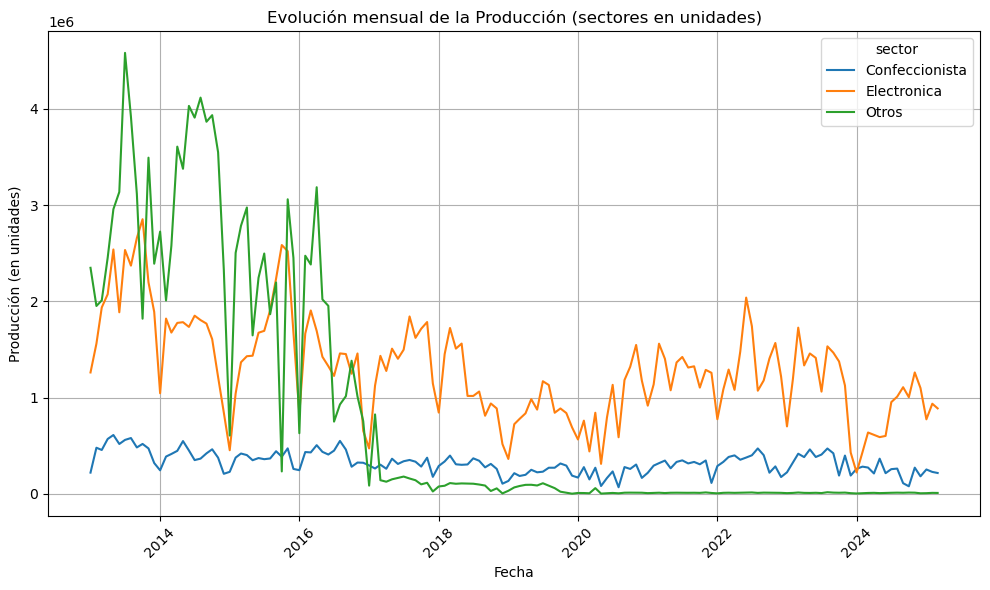

In [80]:
# Orden de los meses para asegurar consistencia temporal
orden_meses = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

# Aseguro el orden y genero la columna 'fecha'
df_unidades['mes'] = pd.Categorical(df_unidades['mes'], categories=orden_meses, ordered=True)
df_unidades['fecha'] = pd.to_datetime(df_unidades['anio'].astype(str) + '-' + (df_unidades['mes'].cat.codes + 1).astype(str), errors='coerce')


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_unidades, x='fecha', y='Produccion', hue='sector')
plt.title("Evolución mensual de la Producción (sectores en unidades)")
plt.xlabel("Fecha")
plt.ylabel("Producción (en unidades)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

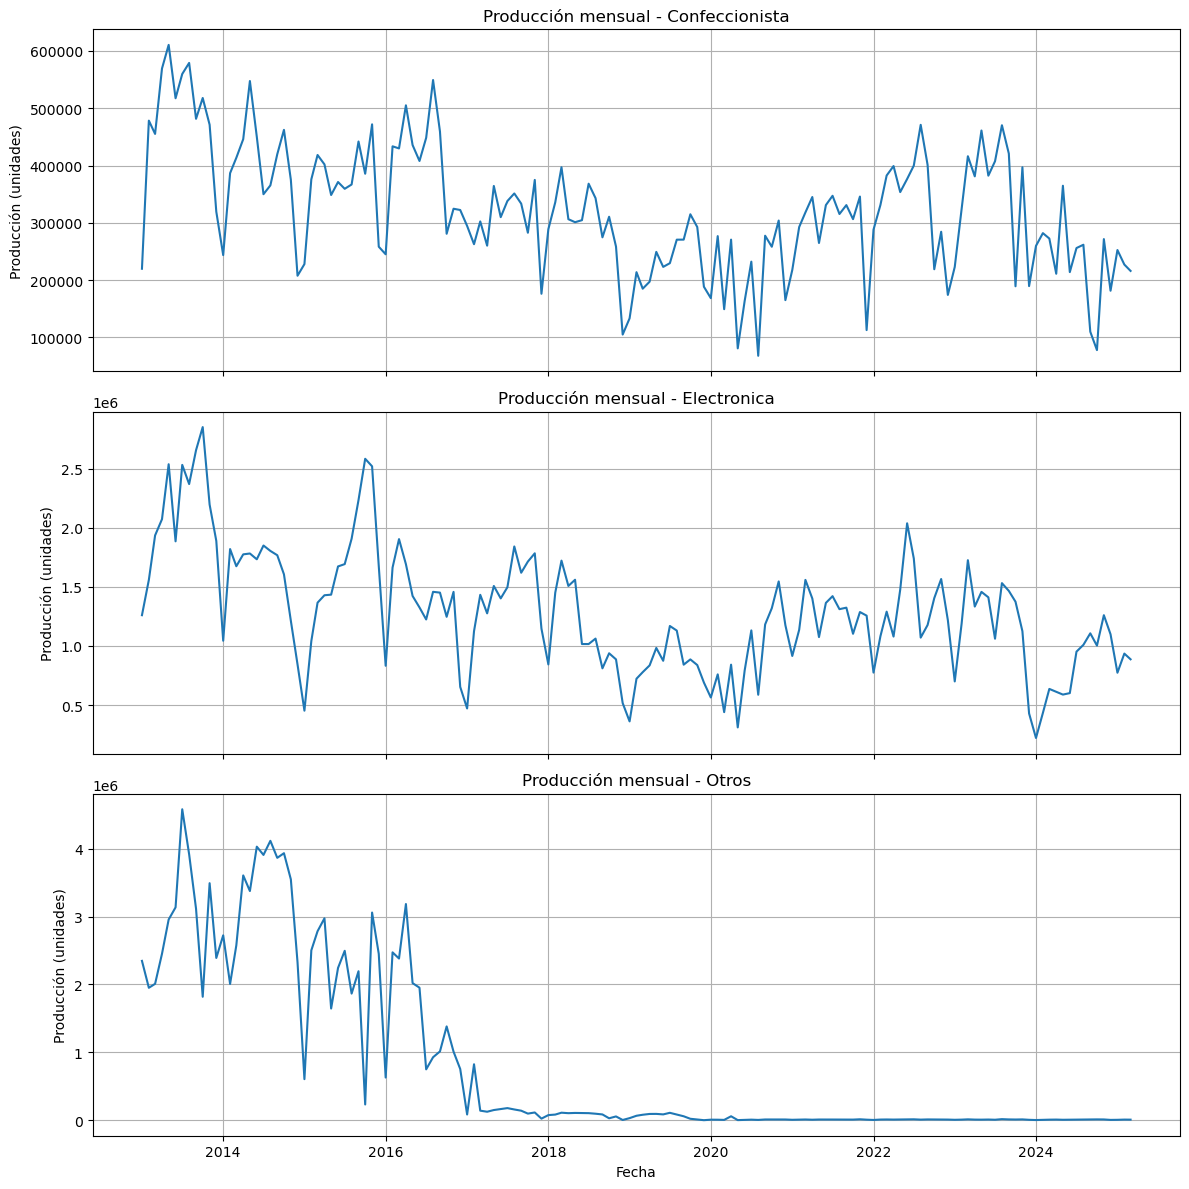

In [81]:
# Gráficos separados por sector en un solo panel (subplots)
sectores = df_unidades['sector'].unique()
num_sectores = len(sectores)

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(num_sectores, 1, figsize=(12, 4 * num_sectores), sharex=True)

for i, sector in enumerate(sectores):
    df_sector = df_unidades[df_unidades['sector'] == sector]
    sns.lineplot(data=df_sector, x='fecha', y='Produccion', ax=axes[i])
    axes[i].set_title(f"Producción mensual - {sector}")
    axes[i].set_ylabel("Producción (unidades)")
    axes[i].grid(True)

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


In [82]:
df_unidades.groupby('sector')['Produccion'].describe()

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Confeccionista,147.0,3.230261e+05,1.104749e+05,68020.0,254313.5,318205.0,398109.0,610624.0
Electronica,147.0,1.292193e+06,5.127512e+05,221477.0,925522.0,1260593.0,1586545.5,2852557.0
Otros,147.0,8.318614e+05,1.284650e+06,1170.0,10522.0,75968.0,1842181.0,4580512.0


In [83]:
df_unidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   anio              441 non-null    int32         
 1   mes               441 non-null    category      
 2   sector            441 non-null    object        
 3   Produccion        441 non-null    int32         
 4   empleados         441 non-null    int32         
 5   establecimientos  441 non-null    int32         
 6   fecha             441 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int32(4), object(1)
memory usage: 14.7+ KB


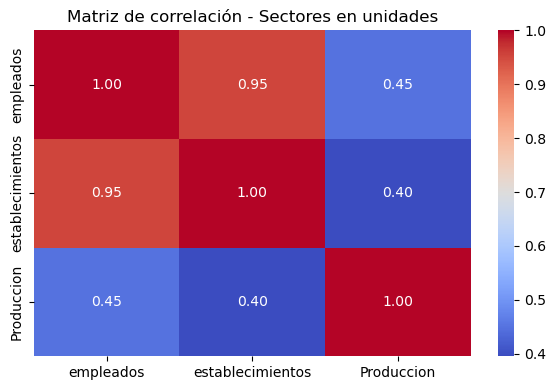

In [84]:
# Selecciono solo columnas numéricas
corr_matrix = df_unidades[['empleados', 'establecimientos', 'Produccion']].corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Sectores en unidades")
plt.tight_layout()
plt.show()


#### Observaciones por sector (gráficos individuales):

Se graficó la producción mensual de cada sector por separado para observar mejor las fluctuaciones internas. Se destacan:

- **Electrónica**: mantiene altos niveles de producción hasta 2016, con caídas graduales posteriores.
- **Confeccionista**: se mantiene estable, aunque con leves caídas en años recientes.
- **Otros**: presenta un comportamiento más irregular, con valores altos al principio que disminuyen hacia 2017 y luego oscilan en un rango bajo.

Este enfoque permite estudiar cada sector sin perder detalle por diferencias de escala, lo cual será clave al momento de construir modelos específicos por grupo de unidades.


#### Relación empleados vs producción por sector

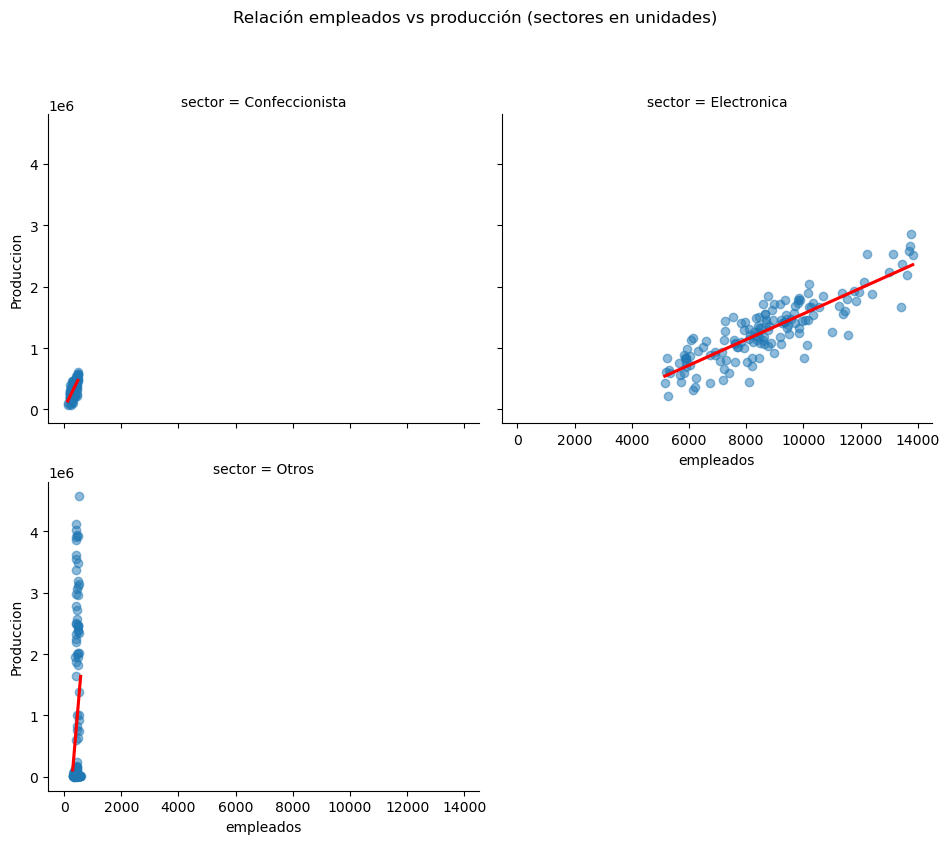

In [85]:
# Gráfico de regresión por sector
g_unidades = sns.lmplot(
    data=df_unidades,
    x="empleados", y="Produccion",
    col="sector", col_wrap=2,
    height=4, aspect=1.2,
    scatter_kws={"alpha":0.5},
    line_kws={"color": "red"},
    ci=None
)

g_unidades.fig.suptitle("Relación empleados vs producción (sectores en unidades)", y=1.05)
plt.tight_layout()
plt.show()

In [86]:
# Calculo el coeficiente de correlación de Pearson para cada sector
df_unidades.groupby('sector')[['empleados', 'Produccion']].corr().iloc[0::2, -1]


sector                   
Confeccionista  empleados    0.680756
Electronica     empleados    0.859833
Otros           empleados    0.234959
Name: Produccion, dtype: float64

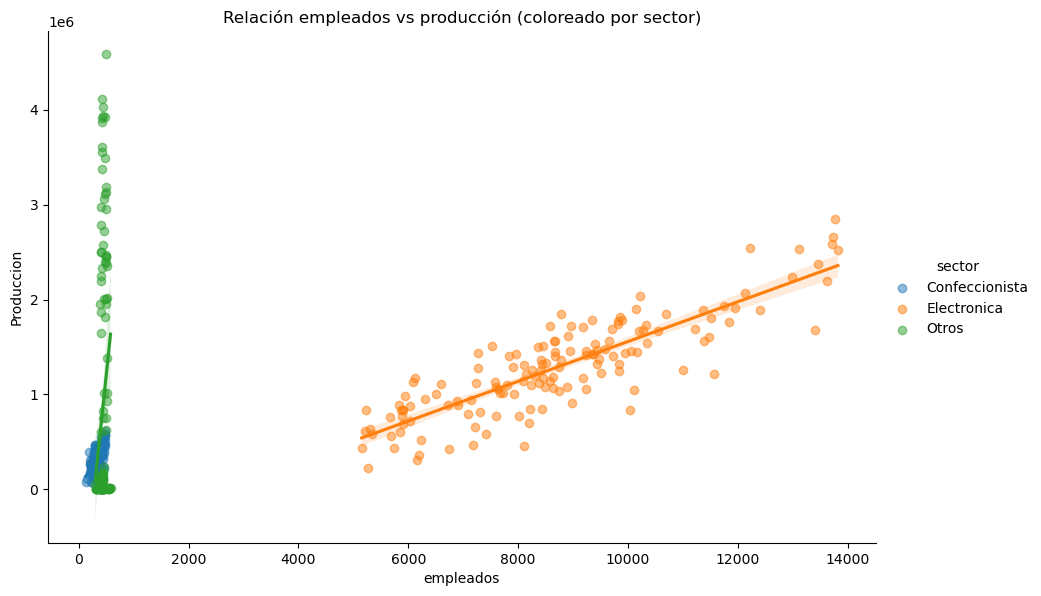

In [87]:
sns.lmplot(
    data=df_unidades,
    x="empleados", y="Produccion",
    hue="sector",
    height=6, aspect=1.5,
    scatter_kws={"alpha":0.5}
)
plt.title("Relación empleados vs producción (coloreado por sector)")
plt.show()


In [88]:
# Subconjunto de sectores en unidades (solo Confeccionista y Electronica)
sectores_conf_elec = ['Confeccionista', 'Electronica']

df_unidades_conf_elec = df_unidades[df_unidades['sector'].isin(sectores_conf_elec)].reset_index(drop=True)

# Verificación rápida
print("Sectores incluidos:", df_unidades_conf_elec['sector'].unique())
print("Tamaño del dataframe:", df_unidades_conf_elec.shape)

Sectores incluidos: ['Confeccionista' 'Electronica']
Tamaño del dataframe: (294, 7)


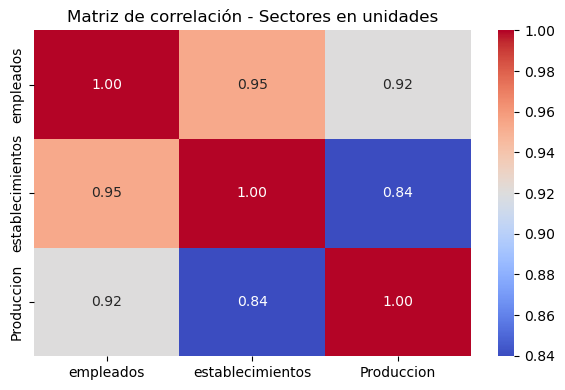

In [89]:
# Selecciono solo columnas numéricas
corr_matrix = df_unidades_conf_elec[['empleados', 'establecimientos', 'Produccion']].corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Sectores en unidades")
plt.tight_layout()
plt.show()

#### Refinamiento del dataset para modelado en unidades

A partir del análisis exploratorio realizado sobre el dataset `df_unidades`, observé que la relación entre la cantidad de empleados y la producción varía notablemente según el sector.

Los sectores **Electrónica** y **Confeccionista** mostraron una fuerte correlación positiva con la producción, mientras que el sector **Otros** presentó una alta dispersión, baja correlación y un patrón poco definido.

Por esta razón, decidí excluir el sector **"Otros"** del análisis principal de regresión en unidades, y generar un nuevo subconjunto llamado `df_unidades_conf_elec`, que incluye únicamente los sectores **Confeccionista** y **Electrónica**.

Esta decisión permite mejorar la coherencia del modelo, eliminando ruido y evitando mezclar sectores con comportamientos productivos heterogéneos. Considero que el sector "Otros" podria ser analizado por separado más adelante.


In [90]:
df_unidades_conf_elec

,anio,mes,sector,Produccion,empleados,establecimientos,fecha
0,2013,enero,Confeccionista,219953,452,6,2013-01-01
1,2013,enero,Electronica,1260521,11001,27,2013-01-01
2,2013,febrero,Confeccionista,478428,465,6,2013-02-01
3,2013,febrero,Electronica,1559546,11381,27,2013-02-01
4,2013,marzo,Confeccionista,455248,470,6,2013-03-01
...,...,...,...,...,...,...,...
289,2025,enero,Electronica,773676,7604,19,2025-01-01
290,2025,febrero,Confeccionista,227247,234,4,2025-02-01
291,2025,febrero,Electronica,935562,6891,19,2025-02-01
292,2025,marzo,Confeccionista,216133,238,4,2025-03-01


### 7.2 Análisis exploratorio: sectores con producción en kilogramos

Esta sección analiza la evolución temporal de los sectores industriales cuya producción está medida en **kilogramos**.  
Sectores incluidos:

- Textil
- Plástica
- Pesquera

Se busca identificar patrones, caídas abruptas, estacionalidades o tendencias estructurales.


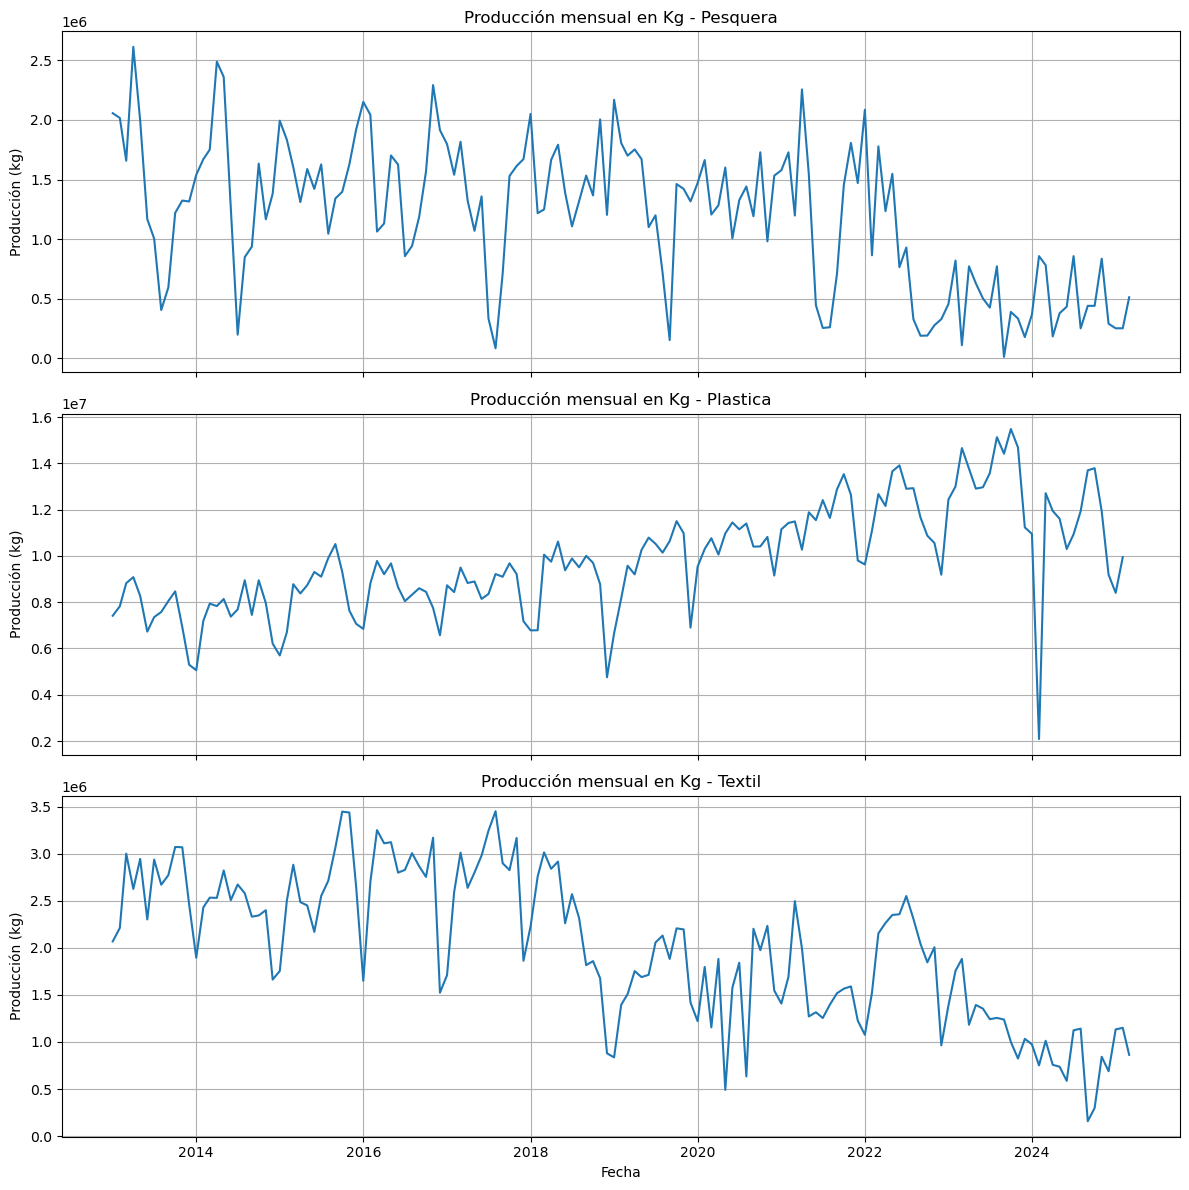

In [91]:
# Orden de los meses
orden_meses = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

df_kilos['mes'] = pd.Categorical(df_kilos['mes'], categories=orden_meses, ordered=True)
df_kilos['fecha'] = pd.to_datetime(df_kilos['anio'].astype(str) + '-' + (df_kilos['mes'].cat.codes + 1).astype(str), errors='coerce')

# Subplots individuales por sector
sectores_kilos = df_kilos['sector'].unique()
num_sectores_kilos = len(sectores_kilos)

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(num_sectores_kilos, 1, figsize=(12, 4 * num_sectores_kilos), sharex=True)

for i, sector in enumerate(sectores_kilos):
    df_sector = df_kilos[df_kilos['sector'] == sector]
    sns.lineplot(data=df_sector, x='fecha', y='Produccion', ax=axes[i])
    axes[i].set_title(f"Producción mensual en Kg - {sector}")
    axes[i].set_ylabel("Producción (kg)")
    axes[i].grid(True)

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


In [92]:
df_kilos.groupby('sector')['Produccion'].describe()

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Pesquera,147.0,1.192325e+06,6.086828e+05,13803.0,741633.0,1284353.0,1630563.50,2612904.0
Plastica,146.0,9.815343e+06,2.305450e+06,2088824.0,8331674.5,9653358.0,11357306.75,15482008.0
Textil,147.0,2.008523e+06,7.740792e+05,158735.0,1394005.5,2056799.0,2638685.50,3450068.0


In [93]:
df_kilos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   anio              440 non-null    int32         
 1   mes               440 non-null    category      
 2   sector            440 non-null    object        
 3   Produccion        440 non-null    int32         
 4   empleados         440 non-null    int32         
 5   establecimientos  440 non-null    int32         
 6   fecha             440 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int32(4), object(1)
memory usage: 14.7+ KB


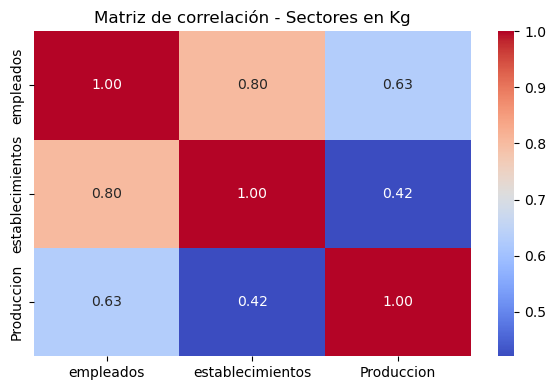

In [94]:
# Selecciono solo columnas numéricas
corr_matrix = df_kilos[['empleados', 'establecimientos', 'Produccion']].corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Sectores en Kg")
plt.tight_layout()
plt.show()

#### Observaciones por sector (producción en kilogramos):

- **Pesquera**: presenta una alta variabilidad, con picos de producción por encima de los 2.5 millones de kilos y caídas bruscas que rozan valores mínimos. No se observa una tendencia sostenida, lo cual podría indicar una fuerte estacionalidad o inestabilidad estructural en el sector.

- **Plástica**: es el sector con mayor volumen de producción (media cercana a los 10 millones de kilos mensuales), y una tendencia claramente ascendente a lo largo de los años, aunque con oscilaciones puntuales hacia el final del período. Es un candidato fuerte para modelos que capten crecimiento sostenido.

- **Textil**: muestra una caída progresiva en la producción desde 2018. Si bien inicia con niveles cercanos a los 3 millones de kilos, hacia 2024-2025 cae a valores cercanos al millón. Esta tendencia descendente puede reflejar una pérdida de competitividad o cambios en la estructura del sector.

En conjunto, estos gráficos reafirman que incluso compartiendo unidad de medida (kilogramos), los sectores presentan comportamientos heterogéneos, por lo que es conveniente analizarlos por separado o incluir variables categóricas y de interacción si se desea un modelo conjunto.


#### Relacion Empleados vs Produccion por sector

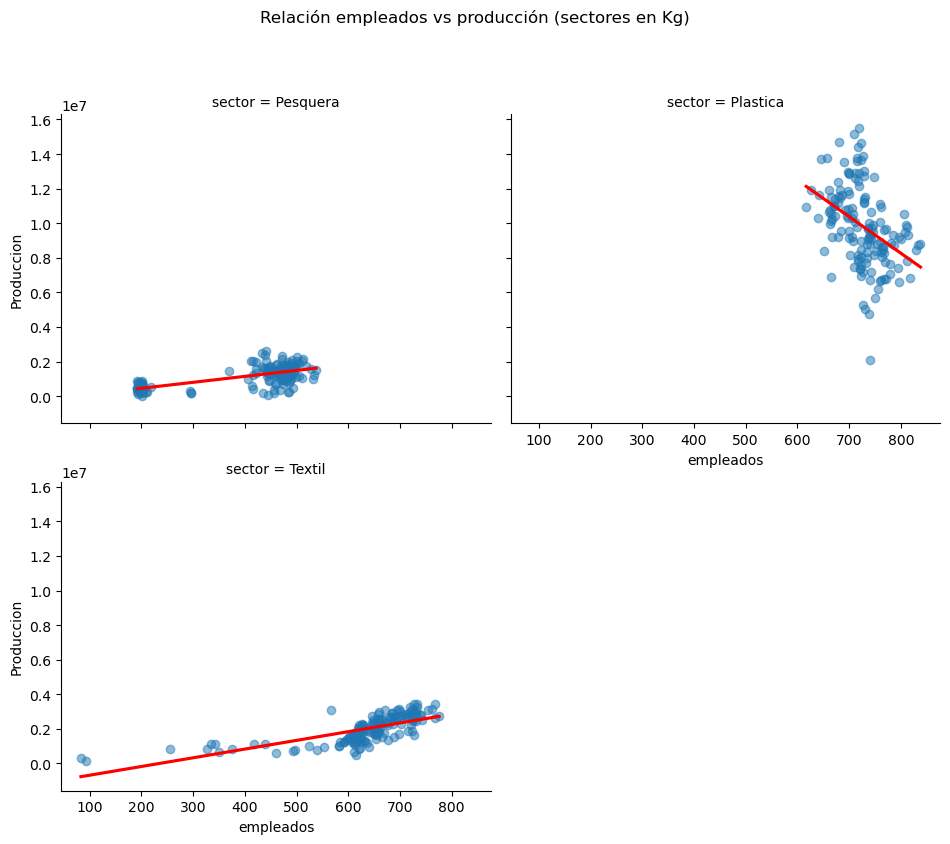

In [95]:
# Gráfico de regresión por sector
g_unidades = sns.lmplot(
    data=df_kilos,
    x="empleados", y="Produccion",
    col="sector", col_wrap=2,
    height=4, aspect=1.2,
    scatter_kws={"alpha":0.5},
    line_kws={"color": "red"},
    ci=None
)

g_unidades.fig.suptitle("Relación empleados vs producción (sectores en Kg)", y=1.05)
plt.tight_layout()
plt.show()

In [96]:
# Calculo el coeficiente de correlación de Pearson para cada sector
df_kilos.groupby('sector')[['empleados', 'Produccion']].corr().iloc[0::2, -1]

sector             
Pesquera  empleados    0.624567
Plastica  empleados   -0.410013
Textil    empleados    0.712922
Name: Produccion, dtype: float64

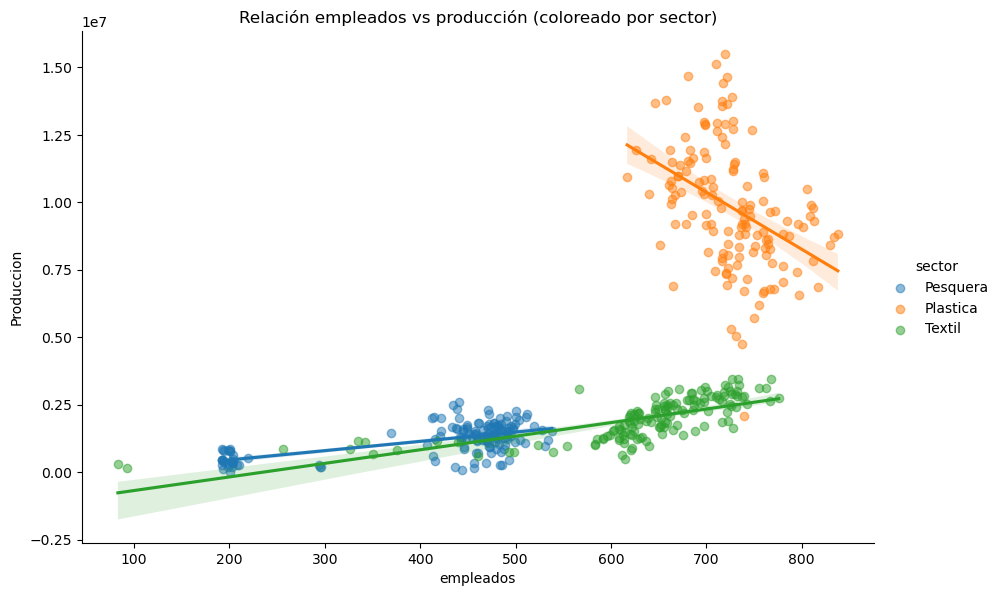

In [97]:
sns.lmplot(
    data=df_kilos,
    x="empleados", y="Produccion",
    hue="sector",
    height=6, aspect=1.5,
    scatter_kws={"alpha":0.5}
)
plt.title("Relación empleados vs producción (coloreado por sector)")
plt.show()

In [98]:
# Filtramos df_kilos para quedarnos solo con Textil y Pesquera
df_kilos_text_pesq = df_kilos[df_kilos['sector'].isin(['Textil', 'Pesquera'])].copy()

# Verificamos resultado
print("Sectores presentes:", df_kilos_text_pesq['sector'].unique())
print("Dimensiones del nuevo DataFrame:", df_kilos_text_pesq.shape)
df_kilos_text_pesq.head()

Sectores presentes: ['Pesquera' 'Textil']
Dimensiones del nuevo DataFrame: (294, 7)


,anio,mes,sector,Produccion,empleados,establecimientos,fecha
0,2013,enero,Pesquera,2056519,415,3,2013-01-01
2,2013,enero,Textil,2067922,662,8,2013-01-01
3,2013,febrero,Pesquera,2016742,412,3,2013-02-01
5,2013,febrero,Textil,2210462,677,8,2013-02-01
6,2013,marzo,Pesquera,1658171,433,3,2013-03-01


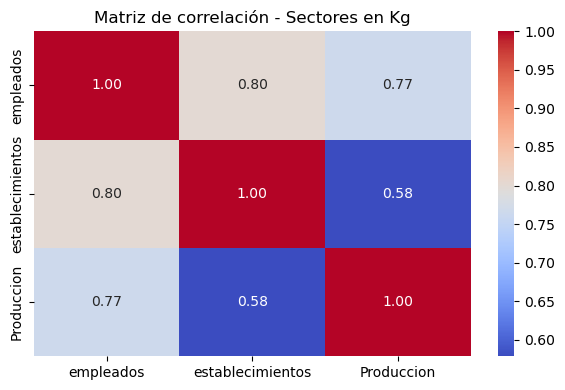

In [99]:
# Selecciono solo columnas numéricas
corr_matrix = df_kilos_text_pesq[['empleados', 'establecimientos', 'Produccion']].corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación - Sectores en Kg")
plt.tight_layout()
plt.show()

#### Refinamiento del dataset para modelado en kilogramos

A partir del análisis exploratorio realizado sobre el dataset `df_kilos`, se observé que la relación entre la cantidad de empleados y la producción mensual varía considerablemente entre sectores.

Los sectores **Textil** y **Pesquera** presentan una correlación positiva clara entre empleados y producción, lo cual permite justificar su inclusión en un modelo de regresión supervisado. Por ejemplo:
- En el sector **Textil**,  observé una correlación de 0.71 entre empleados y producción, con un patrón visualmente coherente y continuo.
- En el sector **Pesquera**, la correlación es de 0.62, también positiva y con una tendencia observable a lo largo del tiempo.

Por el contrario, el sector **Plástica** mostró un comportamiento atípico: presentó una correlación negativa entre empleados y producción (-0.41), además de una elevada dispersión de valores y una posible estructura no lineal. Esto podría deberse a factores específicos de ese rubro (automatización, cambios de escala, reorganización productiva), pero su inclusión afectaría negativamente la estabilidad y coherencia del modelo.

Por este motivo, se generó un nuevo subconjunto llamado `df_kilos_text_pesq`, que incluye únicamente los sectores **Textil** y **Pesquera** para el modelado en kilogramos. Esta decisión permite reducir el ruido en los datos y aumentar la precisión del modelo final. El sector `Plástica` podrá ser analizado por separado en etapas posteriores.


In [100]:
df_kilos_text_pesq

,anio,mes,sector,Produccion,empleados,establecimientos,fecha
0,2013,enero,Pesquera,2056519,415,3,2013-01-01
2,2013,enero,Textil,2067922,662,8,2013-01-01
3,2013,febrero,Pesquera,2016742,412,3,2013-02-01
5,2013,febrero,Textil,2210462,677,8,2013-02-01
6,2013,marzo,Pesquera,1658171,433,3,2013-03-01
...,...,...,...,...,...,...,...
434,2025,enero,Textil,1133811,342,6,2025-01-01
435,2025,febrero,Pesquera,253115,208,2,2025-02-01
437,2025,febrero,Textil,1150230,335,6,2025-02-01
438,2025,marzo,Pesquera,513161,219,2,2025-03-01


## 8. Modelado de regresión supervisada

En esta sección se desarrollan modelos de regresión lineal múltiple con el objetivo de predecir la producción mensual por sector industrial, utilizando variables explicativas estructurales y temporales.

Se evaluarán dos enfoques diferentes:

### Modelo general
Se utiliza un único modelo que incluye registros de múltiples sectores. Para capturar diferencias entre sectores, se incorpora la variable `sector` como variable categórica mediante codificación one-hot (dummies). Las variables independientes consideradas inicialmente son:

- `empleados`: cantidad de personal ocupado en el sector
- `establecimientos`: cantidad de establecimientos activos en el sector
- `anio`: componente temporal para capturar tendencias
- `sector_*`: variables dummies para cada categoría del sector

Este modelo permite evaluar si es posible predecir la producción de cualquier sector usando una sola regresión generalizada.

### Modelos por sector
En este enfoque se entrena un modelo específico para cada sector, permitiendo que cada uno tenga su propio ajuste en la relación entre variables. Este camino se justifica cuando los sectores presentan dinámicas internas distintas, como se evidenció en el análisis exploratorio (EDA).

Se comparará el rendimiento de ambos enfoques para cada subconjunto (`df_unidades_conf_elec` y `df_kilos_text_pesq`) y se tomarán decisiones fundamentadas sobre qué estrategia ofrece mejores resultados.

---


### Modelo general – Sectores Confeccionista y Electrónica

Este modelo utiliza un enfoque unificado de regresión lineal múltiple para predecir la producción mensual combinada de los sectores **Confeccionista** y **Electrónica**.

Se incluyen como variables independientes:

- `empleados`: cantidad de personal ocupado
- `establecimientos`: cantidad de establecimientos activos
- `anio`: componente temporal para capturar tendencias
- `sector_Electronica`: variable dummy para distinguir entre sectores (siendo `Confeccionista` la categoría base)

Este enfoque permite evaluar si es posible modelar ambos sectores con una misma regresión, capturando las diferencias estructurales mediante variables categóricas.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 1. Creamos una copia del DataFrame para no modificar el original
df_modelo = df_unidades_conf_elec.copy()

# 2. Creamos las variables dummy para 'sector'
df_modelo = pd.get_dummies(df_modelo, columns=['sector'], drop_first=True)  # Evita multicolinealidad

# 3. Definimos X e y
X = df_modelo[['empleados', 'establecimientos', 'anio', 'sector_Electronica']]  # Confeccionista es la base
y = df_modelo['Produccion']

# 4. Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 6. Predicciones
y_pred = modelo.predict(X_test)

In [102]:
df_modelo

,anio,mes,Produccion,empleados,establecimientos,fecha,sector_Electronica
0,2013,enero,219953,452,6,2013-01-01,False
1,2013,enero,1260521,11001,27,2013-01-01,True
2,2013,febrero,478428,465,6,2013-02-01,False
3,2013,febrero,1559546,11381,27,2013-02-01,True
4,2013,marzo,455248,470,6,2013-03-01,False
...,...,...,...,...,...,...,...
289,2025,enero,773676,7604,19,2025-01-01,True
290,2025,febrero,227247,234,4,2025-02-01,False
291,2025,febrero,935562,6891,19,2025-02-01,True
292,2025,marzo,216133,238,4,2025-03-01,False


### Modelo individual – Sector Electrónica

En esta sección se entrena un modelo de regresión lineal múltiple utilizando únicamente los registros correspondientes al sector **Electrónica**.

El objetivo es predecir la producción mensual del sector a partir de:

- `empleados`: cantidad de personal ocupado
- `establecimientos`: cantidad de establecimientos activos
- `anio`: para capturar posibles tendencias temporales

Este modelo permite evaluar el ajuste específico de este sector, sin interferencia de datos de otros rubros.


In [103]:
# Filtramos el sector Electrónica
df_elec = df_unidades_conf_elec[df_unidades_conf_elec['sector'] == 'Electronica'].copy()

# Definimos X e y
X_elec = df_elec[['empleados', 'establecimientos', 'anio']]
y_elec = df_elec['Produccion']

# División train/test
X_train_elec, X_test_elec, y_train_elec, y_test_elec = train_test_split(X_elec, y_elec, test_size=0.2, random_state=42)

# Modelo
modelo_elec = LinearRegression()
modelo_elec.fit(X_train_elec, y_train_elec)

# Predicciones
y_pred_elec = modelo_elec.predict(X_test_elec)

In [104]:
df_elec

,anio,mes,sector,Produccion,empleados,establecimientos,fecha
1,2013,enero,Electronica,1260521,11001,27,2013-01-01
3,2013,febrero,Electronica,1559546,11381,27,2013-02-01
5,2013,marzo,Electronica,1935759,11753,27,2013-03-01
7,2013,abril,Electronica,2072806,12124,27,2013-04-01
9,2013,mayo,Electronica,2538083,12227,27,2013-05-01
...,...,...,...,...,...,...,...
285,2024,noviembre,Electronica,1260593,8257,19,2024-11-01
287,2024,diciembre,Electronica,1099022,7804,19,2024-12-01
289,2025,enero,Electronica,773676,7604,19,2025-01-01
291,2025,febrero,Electronica,935562,6891,19,2025-02-01


### Modelo individual – Sector Confeccionista

En esta sección se entrena un modelo de regresión lineal múltiple utilizando únicamente los registros correspondientes al sector **Confeccionista**.

Las variables utilizadas para predecir la producción mensual son:

- `empleados`: cantidad de personal ocupado
- `establecimientos`: cantidad de establecimientos activos
- `anio`: variable temporal para capturar posibles tendencias lineales a lo largo del tiempo

Este modelo busca capturar la dinámica particular del sector, evaluando su desempeño de manera aislada, sin la influencia de otros sectores.



In [105]:
# Filtramos el sector Confeccionista
df_conf = df_unidades_conf_elec[df_unidades_conf_elec['sector'] == 'Confeccionista'].copy()

# Definimos X e y
X_conf = df_conf[['empleados', 'establecimientos', 'anio']]
y_conf = df_conf['Produccion']

# División train/test
X_train_conf, X_test_conf, y_train_conf, y_test_conf = train_test_split(X_conf, y_conf, test_size=0.2, random_state=42)

# Modelo
modelo_conf = LinearRegression()
modelo_conf.fit(X_train_conf, y_train_conf)

# Predicciones
y_pred_conf = modelo_conf.predict(X_test_conf)

In [106]:
df_conf

,anio,mes,sector,Produccion,empleados,establecimientos,fecha
0,2013,enero,Confeccionista,219953,452,6,2013-01-01
2,2013,febrero,Confeccionista,478428,465,6,2013-02-01
4,2013,marzo,Confeccionista,455248,470,6,2013-03-01
6,2013,abril,Confeccionista,569380,481,6,2013-04-01
8,2013,mayo,Confeccionista,610624,476,6,2013-05-01
...,...,...,...,...,...,...,...
284,2024,noviembre,Confeccionista,271658,237,4,2024-11-01
286,2024,diciembre,Confeccionista,181567,223,4,2024-12-01
288,2025,enero,Confeccionista,252577,231,4,2025-01-01
290,2025,febrero,Confeccionista,227247,234,4,2025-02-01


### Evaluación comparativa de modelos – Sectores en unidades

En esta sección se realiza una evaluación integral de los tres modelos entrenados sobre los sectores cuya producción está medida en **unidades**:

- Modelo general con `sector` como variable dummy (`df_unidades_conf_elec`)
- Modelo individual – Electrónica
- Modelo individual – Confeccionista

Para cada modelo se calcularán las siguientes métricas:

- **MAE (Mean Absolute Error)**: error absoluto promedio
- **RMSE (Root Mean Squared Error)**: penaliza errores grandes
- **MedAE (Median Absolute Error)**: más robusto frente a valores atípicos
- **R² (Coeficiente de determinación)**: proporción de varianza explicada
- **Explained variance score**: medida complementaria a R²

Además, se visualizarán los residuos para verificar linealidad y homocedasticidad. Esto permitirá identificar qué modelo se ajusta mejor y con qué configuración de variables.



Resultados para Modelo General (Conf + Elec)
MAE:  115847.74
RMSE: 180185.87
MedAE: 72630.83
Explained Variance: 0.921
R²: 0.920


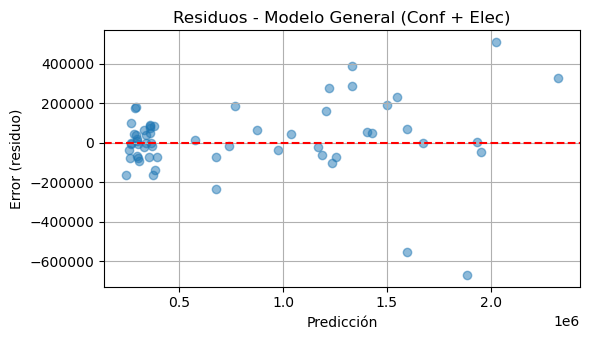


Resultados para Modelo Individual – Electrónica
MAE:  206570.59
RMSE: 291150.76
MedAE: 141689.76
Explained Variance: 0.639
R²: 0.638


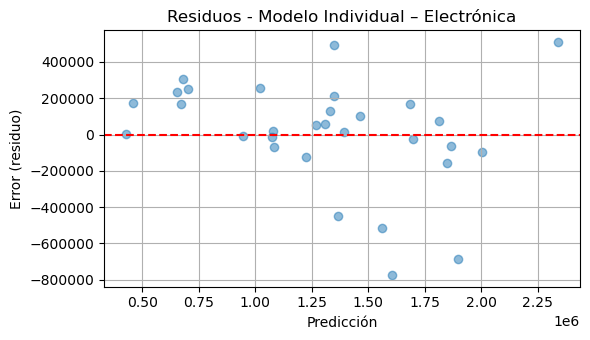


Resultados para Modelo Individual – Confeccionista
MAE:  59307.92
RMSE: 78707.51
MedAE: 46740.36
Explained Variance: -0.240
R²: -0.249


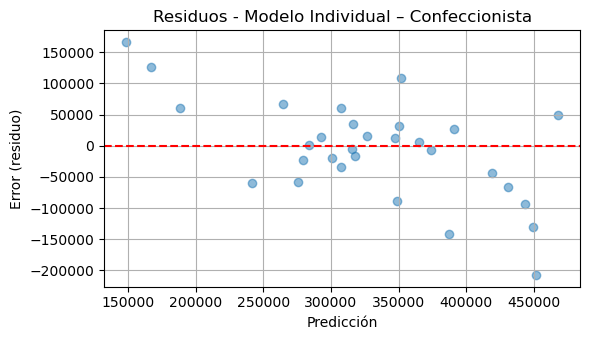

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
import matplotlib.pyplot as plt
import numpy as np

def evaluar_modelo(y_test, y_pred, nombre_modelo):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    print(f"\nResultados para {nombre_modelo}")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MedAE: {medae:.2f}")
    print(f"Explained Variance: {evs:.3f}")
    print(f"R²: {r2:.3f}")
    
    # Gráfico de residuos
    residuos = y_test - y_pred
    plt.figure(figsize=(6, 3.5))
    plt.scatter(y_pred, residuos, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicción")
    plt.ylabel("Error (residuo)")
    plt.title(f"Residuos - {nombre_modelo}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Evaluamos los tres modelos
evaluar_modelo(y_test, y_pred, "Modelo General (Conf + Elec)")
evaluar_modelo(y_test_elec, y_pred_elec, "Modelo Individual – Electrónica")
evaluar_modelo(y_test_conf, y_pred_conf, "Modelo Individual – Confeccionista")


#### Modelo General – Visualización en conjunto

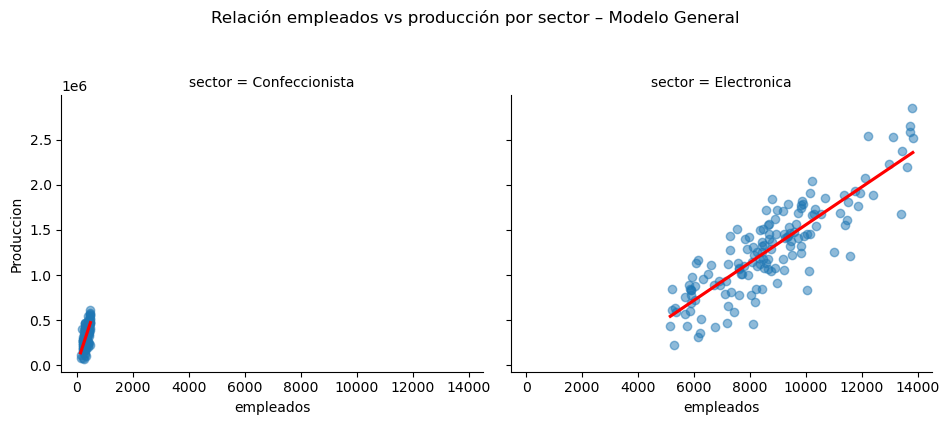

In [108]:
sns.lmplot(
    data=df_unidades_conf_elec,
    x='empleados', y='Produccion',
    col='sector', col_wrap=2,
    height=4, aspect=1.2,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"},
    ci=None
)
plt.suptitle("Relación empleados vs producción por sector – Modelo General", y=1.05)
plt.tight_layout()
plt.show()

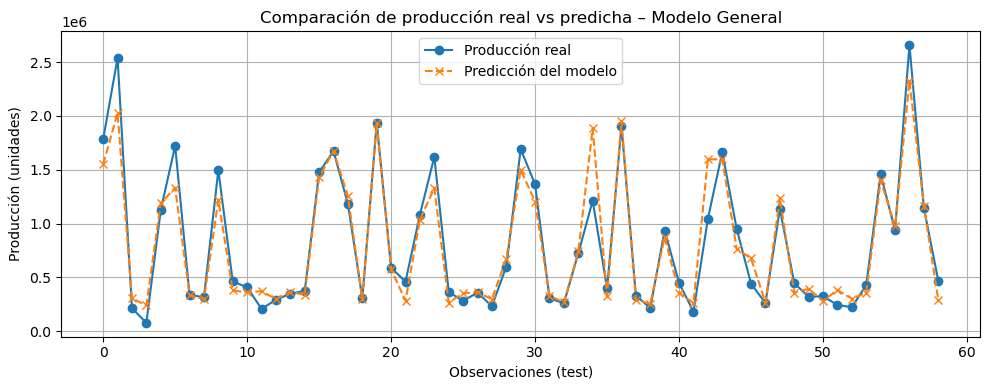

In [109]:
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label="Producción real", marker='o')
plt.plot(y_pred, label="Predicción del modelo", linestyle='--', marker='x')
plt.title("Comparación de producción real vs predicha – Modelo General")
plt.ylabel("Producción (unidades)")
plt.xlabel("Observaciones (test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Modelo individual – Electrónica

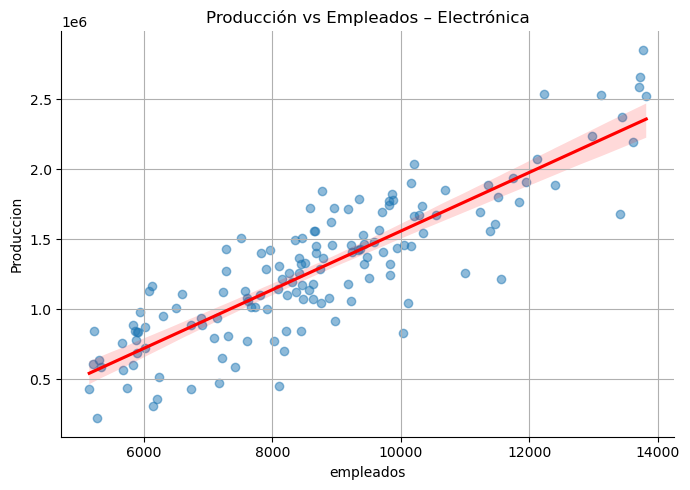

In [110]:
sns.lmplot(data=df_elec, x='empleados', y='Produccion', height=5, aspect=1.4,
           line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Producción vs Empleados – Electrónica")
plt.grid(True)
plt.tight_layout()
plt.show()

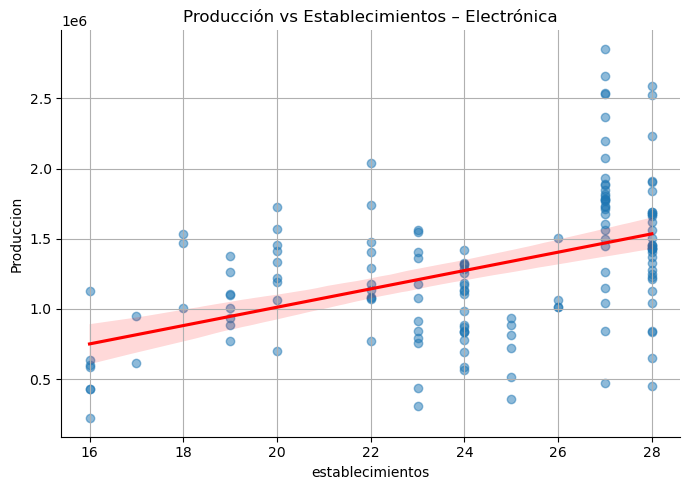

In [111]:
sns.lmplot(data=df_elec, x='establecimientos', y='Produccion', height=5, aspect=1.4,
           line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Producción vs Establecimientos – Electrónica")
plt.grid(True)
plt.tight_layout()
plt.show()

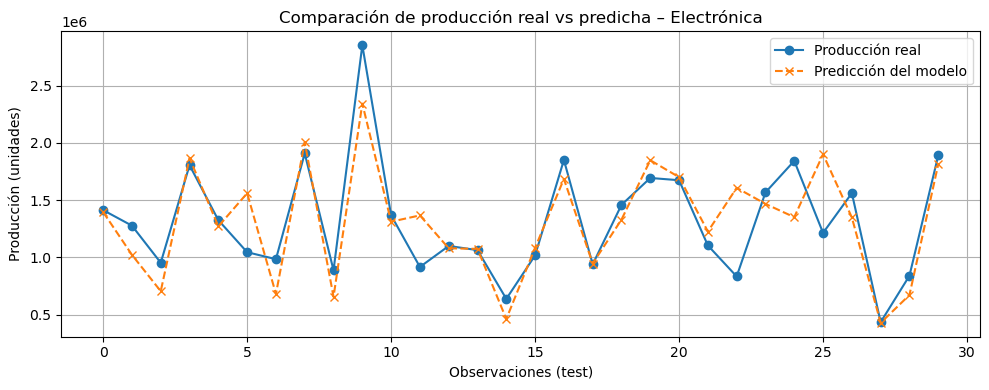

In [112]:
plt.figure(figsize=(10, 4))
plt.plot(y_test_elec.values, label="Producción real", marker='o')
plt.plot(y_pred_elec, label="Predicción del modelo", linestyle='--', marker='x')
plt.title("Comparación de producción real vs predicha – Electrónica")
plt.ylabel("Producción (unidades)")
plt.xlabel("Observaciones (test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Modelo individual – Confeccionista

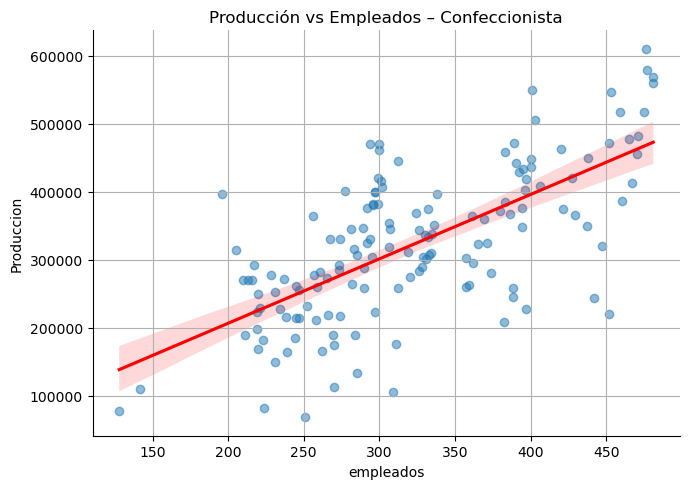

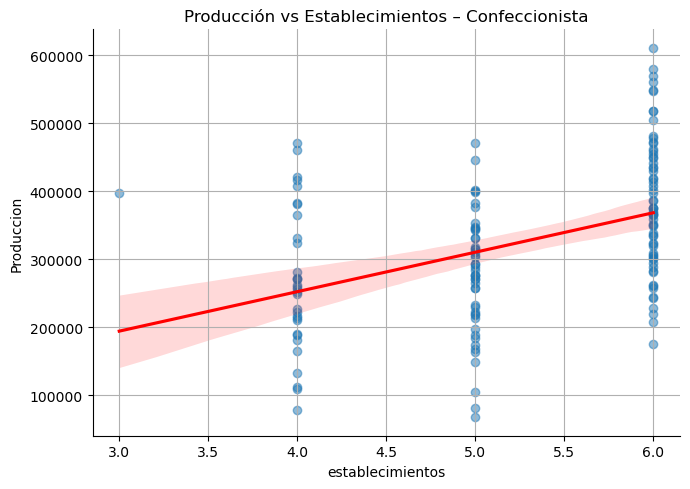

In [113]:
# Producción vs Empleados
sns.lmplot(data=df_conf, x='empleados', y='Produccion', height=5, aspect=1.4,
           line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Producción vs Empleados – Confeccionista")
plt.grid(True)
plt.tight_layout()
plt.show()

# Producción vs Establecimientos
sns.lmplot(data=df_conf, x='establecimientos', y='Produccion', height=5, aspect=1.4,
           line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Producción vs Establecimientos – Confeccionista")
plt.grid(True)
plt.tight_layout()
plt.show()


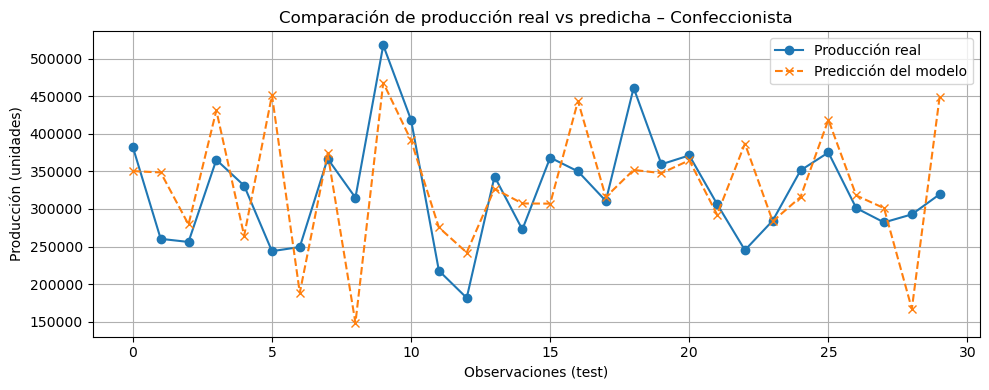

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test_conf.values, label="Producción real", marker='o')
plt.plot(y_pred_conf, label="Predicción del modelo", linestyle='--', marker='x')
plt.title("Comparación de producción real vs predicha – Confeccionista")
plt.ylabel("Producción (unidades)")
plt.xlabel("Observaciones (test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusiones del análisis comparativo de modelos – Producción en unidades

En esta sección finalizo el análisis comparativo de los modelos aplicados a los sectores cuya producción mensual se reporta en unidades físicas: Electrónica y Confeccionista.

Evalué tres enfoques de regresión lineal múltiple:

- Modelo general con ambos sectores combinados (`df_unidades_conf_elec`), utilizando `sector` como variable categórica
- Modelo individual exclusivo para el sector **Electrónica**
- Modelo individual exclusivo para el sector **Confeccionista**

---

#### Evaluación del modelo general

El modelo general logró un desempeño excelente, con un coeficiente de determinación R² = 0.920. Este resultado fue respaldado por el gráfico de producción real vs predicha, donde se observa una alineación muy cercana entre ambas curvas a lo largo del conjunto de prueba. Los residuos están distribuidos de forma balanceada alrededor de cero, sin patrones evidentes de error sistemático.

Este modelo fue entrenado con una combinación de sectores, y la incorporación de la variable `sector` como dummy permitió capturar diferencias entre ambos sin necesidad de separar completamente los procesos productivos.

---

#### Evaluación del modelo individual – Electrónica

El modelo exclusivo para el sector Electrónica obtuvo un R² = 0.638. Si bien el desempeño es inferior al del modelo general, sigue siendo aceptable. La relación entre empleados y producción es fuerte y lineal, como ya se anticipaba en el EDA y en los gráficos de dispersión. La producción real y la predicha muestran un comportamiento sincronizado, aunque con errores algo mayores en las predicciones de mayor escala. 

Los residuos presentan mayor dispersión en valores altos, lo cual sugiere que el modelo tiene más dificultad para ajustar los casos extremos. Aun así, la tendencia general está correctamente representada.

---

#### Evaluación del modelo individual – Confeccionista

El modelo entrenado únicamente con datos del sector Confeccionista presentó un desempeño muy pobre, con un R² negativo (-0.24), lo que indica que el modelo predice peor que simplemente asumir el promedio.

Este resultado se explica por varios factores observados en el análisis:

- El rango de variación de la producción es estrecho, sin una tendencia clara ni estacionalidad
- Las variables predictoras (`empleados`, `establecimientos`) también presentan poca variación
- La variable `establecimientos` es discreta y tiene apenas 4 niveles posibles, lo cual limita su capacidad explicativa
- El modelo no logra seguir las oscilaciones de la producción, como se observa en el gráfico de producción real vs predicha, donde ambas curvas están desalineadas y el error es inestable

Se intentó mejorar el modelo eliminando la variable `anio` y probando regresión regularizada (Ridge), pero ambas alternativas mantuvieron el R² en valores negativos. Por este motivo, decidí descartar el modelo individual de Confeccionista.

---

#### Decisión final

Luego de comparar los tres enfoques, concluyo que **el modelo general con ambos sectores combinados ofrece el mejor desempeño global**, tanto en métricas como en comportamiento visual.

Por lo tanto, mantengo el modelo general como herramienta válida para predecir la producción mensual en unidades para los sectores Electrónica y Confeccionista, con el respaldo de los resultados obtenidos y las visualizaciones construidas.


In [115]:
orden_meses = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

df_modelo = df_unidades_conf_elec.copy()
df_modelo['mes'] = pd.Categorical(df_modelo['mes'], categories=orden_meses, ordered=True)


In [116]:
# Variables dummy para mes (descarto el primer mes para evitar multicolinealidad)
dummies_mes = pd.get_dummies(df_modelo['mes'], prefix='mes', drop_first=True)

# Variables dummy para sector
dummies_sector = pd.get_dummies(df_modelo['sector'], prefix='sector', drop_first=True)


In [117]:
df_modelo = pd.concat([df_modelo, dummies_mes, dummies_sector], axis=1)


In [118]:
columnas_base = ['empleados', 'establecimientos', 'anio']
columnas_mes = dummies_mes.columns.tolist()
columnas_sector = dummies_sector.columns.tolist()

X = df_modelo[columnas_base + columnas_mes + columnas_sector]
y = df_modelo['Produccion']


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_con_mes = LinearRegression()
modelo_con_mes.fit(X_train, y_train)
y_pred_con_mes = modelo_con_mes.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred_con_mes)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_con_mes))
r2 = r2_score(y_test, y_pred_con_mes)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 117200.69
RMSE: 170840.43
R²: 0.928


### Evaluación adicional: incorporación de variable mes al modelo general

Como análisis complementario, decidí evaluar si la incorporación explícita de la variable `mes` al modelo general de regresión podía mejorar su capacidad predictiva. Esta decisión se fundamenta en lo observado durante la exploración de datos (EDA), donde algunos sectores —especialmente Electrónica— mostraban fluctuaciones mensuales que podrían estar asociadas a patrones estacionales.

#### Implementación

Para capturar estas variaciones, transformé la variable `mes` en variables categóricas mediante codificación one-hot (`get_dummies`), excluyendo enero como categoría base para evitar multicolinealidad. El modelo final fue entrenado incluyendo:

- Variables numéricas: `empleados`, `establecimientos`, `anio`
- Variable categórica: `sector_Electronica`
- Dummies de mes: `mes_febrero` a `mes_diciembre`

#### Resultados

Comparando con el modelo general original:

| Modelo                  | MAE        | RMSE       | R²     |
|-------------------------|------------|------------|--------|
| Modelo original         | 115.848    | 180.186    | 0.920  |
| Modelo con variable mes | 117.201    | 170.840    | 0.928  |

El modelo con `mes` obtuvo un leve incremento en el coeficiente de determinación (R²), y una mejora en RMSE, lo que indica una predicción más ajustada en términos generales.

#### Limitación práctica

A pesar de la mejora en el desempeño, el modelo con `mes` requiere la preparación manual de múltiples variables dummy en el momento de hacer una predicción, lo que complica su reutilización y lo vuelve menos práctico para usuarios finales o aplicaciones automatizadas.

#### Decisión

Por este motivo, decidí **mantener el modelo original como versión principal** del proyecto, priorizando la claridad, facilidad de uso y compatibilidad general. No obstante, conservo el modelo con `mes` como una versión alternativa optimizada, útil en contextos donde se desea un ajuste más fino y se puede automatizar la generación de las variables necesarias.


### Modelo general – Sectores Textil y Pesquera

Este modelo aplica un enfoque de regresión lineal múltiple para predecir la producción mensual combinada de los sectores **Textil** y **Pesquera**, cuya producción se reporta en kilogramos.

Se incluyen como variables independientes:

- `empleados`: cantidad de personal ocupado  
- `establecimientos`: cantidad de establecimientos industriales activos  
- `anio`: componente temporal para capturar tendencias  
- `sector_Pesquera`: variable dummy que distingue entre sectores (siendo **Textil** la categoría base)  

El objetivo de este modelo es evaluar si es posible representar ambos sectores con una regresión unificada, incorporando diferencias estructurales a través de variables categóricas.


In [120]:
# 1. Copiamos el DataFrame limpio
df_modelo_kg = df_kilos_text_pesq.copy()

# 2. Creamos la variable dummy para 'sector'
df_modelo_kg = pd.get_dummies(df_modelo_kg, columns=['sector'], drop_first=True)  # Textil es la dummy

# 3. Definimos X (variables independientes) e y (variable objetivo)
X_kg = df_modelo_kg[['empleados', 'establecimientos', 'anio', 'sector_Textil']]
y_kg = df_modelo_kg['Produccion']

# 4. División en entrenamiento y prueba
X_train_kg, X_test_kg, y_train_kg, y_test_kg = train_test_split(X_kg, y_kg, test_size=0.2, random_state=42)

# 5. Entrenamiento del modelo
modelo_kg = LinearRegression()
modelo_kg.fit(X_train_kg, y_train_kg)

# 6. Predicciones
y_pred_kg = modelo_kg.predict(X_test_kg)

### Modelo individual – Sector Textil

En esta sección entreno un modelo de regresión lineal múltiple utilizando únicamente los registros correspondientes al sector **Textil**.

El objetivo es predecir la producción mensual del sector a partir de:

- `empleados`: cantidad de personal ocupado  
- `establecimientos`: cantidad de establecimientos activos  
- `anio`: componente temporal para capturar tendencias

Este modelo permite evaluar el ajuste específico de este sector sin la interferencia de datos provenientes de otros rubros industriales.


In [121]:
# Filtro solo el sector Textil
df_textil = df_kilos_text_pesq[df_kilos_text_pesq['sector'] == 'Textil'].copy()

# Defino X e y
X_textil = df_textil[['empleados', 'establecimientos', 'anio']]
y_textil = df_textil['Produccion']

# División entrenamiento / prueba
X_train_textil, X_test_textil, y_train_textil, y_test_textil = train_test_split(X_textil, y_textil, test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo_textil = LinearRegression()
modelo_textil.fit(X_train_textil, y_train_textil)

# Predicción
y_pred_textil = modelo_textil.predict(X_test_textil)

## Modelo individual – Sector Pesquera

Aquí entreno un modelo de regresión lineal múltiple para el sector **Pesquera**, considerando únicamente sus datos históricos.

Las variables independientes utilizadas son:

- `empleados`: cantidad de personal ocupado  
- `establecimientos`: cantidad de establecimientos activos  
- `anio`: variable temporal que podría capturar evolución o estacionalidades

Este enfoque busca identificar el comportamiento del sector pesquero de forma aislada, detectando su capacidad predictiva propia.


In [122]:
# Filtro solo el sector Pesquera
df_pesquera = df_kilos_text_pesq[df_kilos_text_pesq['sector'] == 'Pesquera'].copy()

# Defino X e y
X_pesq = df_pesquera[['empleados', 'establecimientos', 'anio']]
y_pesq = df_pesquera['Produccion']

# División entrenamiento / prueba
X_train_pesq, X_test_pesq, y_train_pesq, y_test_pesq = train_test_split(X_pesq, y_pesq, test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo_pesq = LinearRegression()
modelo_pesq.fit(X_train_pesq, y_train_pesq)

# Predicción
y_pred_pesq = modelo_pesq.predict(X_test_pesq)

### Evaluación comparativa de modelos – Sectores Textil y Pesquera

En esta sección realizo una evaluación integral de los tres modelos entrenados sobre los sectores cuya producción está medida en **kilogramos**:

- Modelo general con `sector` como variable dummy (`df_kilos_text_pesq`)
- Modelo individual – Textil
- Modelo individual – Pesquera

Para cada modelo se calculan las siguientes métricas:

- **MAE (Mean Absolute Error)**: error absoluto promedio
- **RMSE (Root Mean Squared Error)**: penaliza errores grandes
- **MedAE (Median Absolute Error)**: más robusto frente a valores atípicos
- **R² (Coeficiente de determinación)**: proporción de varianza explicada
- **Explained variance score**: medida complementaria a R²

Además, visualizo los residuos para verificar linealidad y homocedasticidad. Esto permite identificar qué modelo se ajusta mejor y con qué configuración de variables.



Resultados para Modelo General - Textil + Pesquera
MAE:  404839.25
RMSE: 516357.86
MedAE: 324040.45
Explained Variance: 0.643
R²: 0.641


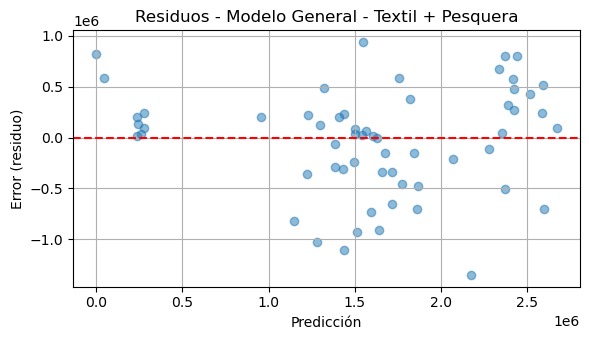


Resultados para Modelo Individual - Textil
MAE:  301927.95
RMSE: 398155.22
MedAE: 251529.21
Explained Variance: 0.672
R²: 0.672


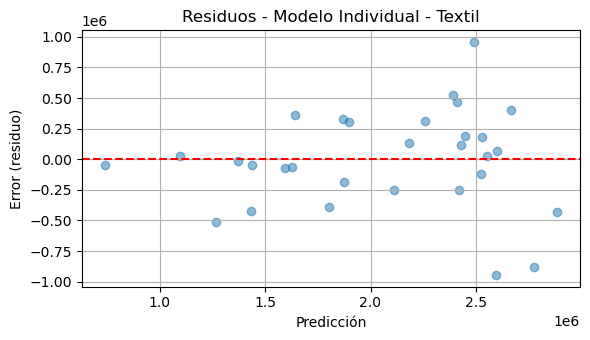


Resultados para Modelo Individual - Pesquera
MAE:  347918.09
RMSE: 466219.16
MedAE: 292452.52
Explained Variance: 0.183
R²: 0.157


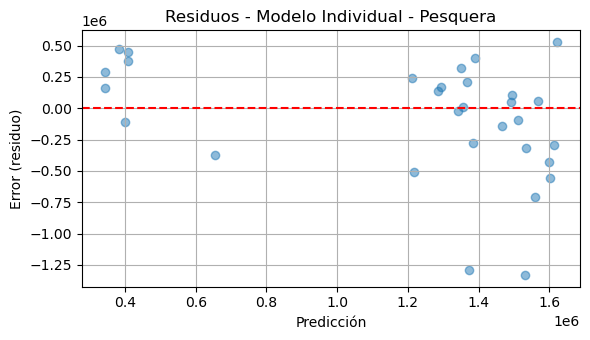

In [123]:
# Evaluación de modelos - Producción en Kg

evaluar_modelo(y_test_kg, y_pred_kg, "Modelo General - Textil + Pesquera")
evaluar_modelo(y_test_textil, y_pred_textil, "Modelo Individual - Textil")
evaluar_modelo(y_test_pesq, y_pred_pesq, "Modelo Individual - Pesquera")